In [1]:
import pandas as pd                # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지
import matplotlib
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.font_manager as fm
from scipy import stats
from statsmodels.formula.api import ols, glm 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import rc

plt.rcParams["figure.figsize"] = (14,4)
%matplotlib inline
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

matplotlib.rc('font', family='Malgun Gothic') 
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:

def mean_norm(df_input):
    return df_input.apply(lambda x: ((x)/ x.sum()))
def mean_norm2(df_input):
    return df_input.apply(lambda x: ((x-x.mean())/ x.std())+100)
def log_scale(df_input):
    return df_input.apply(lambda x: np.log(x))

In [3]:
GDP_time_series = pd.read_csv('./data/세계 GDP.csv',encoding='CP949')

In [4]:

c_list =list(['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Romania','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States'])
c_list=sorted(c_list)

In [5]:

GDP_time_series_pivot=pd.pivot_table(GDP_time_series,index='TIME',columns='Country',values='Value')
GDP_time_series_pivot

Country,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Colombia,...,Saudi Arabia,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
TIME,,,,,,,,,,,,,,,,,,,,,
1960-Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.154327,4.927103
1960-Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.551746,2.058276
1960-Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.890773,2.484652
1960-Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.863382,0.881777
1961-Q1,NaN,3.102825,8.008101,4.953328,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.283162,10.081656,6.962729,9.435371,NaN,3.003682,-0.669494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-Q3,-0.450371,1.824480,1.647827,1.849580,0.691144,3.318156,1.619975,2.773016,6.0,3.408669,...,-0.556607,1.813834,2.744187,0.136604,1.820349,1.738826,1.255890,1.090248,1.028798,2.076481
2019-Q4,-0.334089,2.279479,0.249999,1.595947,1.621077,3.086850,1.514251,-2.389012,6.0,3.631918,...,-0.902465,1.951083,2.092197,-0.565557,1.679243,0.720868,1.478808,6.297175,1.011293,2.338885
2020-Q1,-4.645285,1.560467,-3.015278,-2.031198,-1.428837,2.263517,-0.909460,0.400054,-6.8,0.980362,...,-1.037843,-3.821989,-3.549662,-0.217267,-4.159114,0.679792,-0.671797,4.416187,-2.076543,0.319261


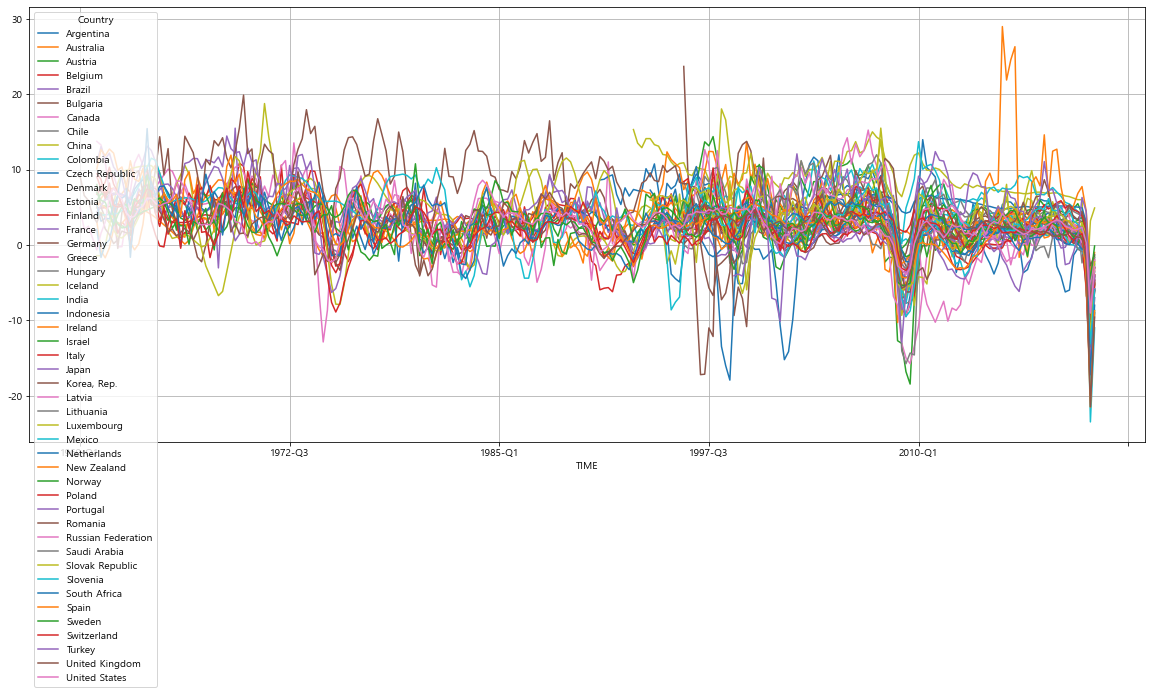

In [6]:
plt.rcParams["figure.figsize"] = (20,8)
GDP_time_series_pivot.plot()
plt.grid(True)

In [7]:
GDP_time_series_pivot = GDP_time_series_pivot.loc[[
              
              '1999-Q1','1999-Q2','1999-Q3','1999-Q4',
              '2000-Q1','2000-Q2','2000-Q3','2000-Q4',
               '2001-Q1','2001-Q2','2001-Q3','2001-Q4',
               '2002-Q1','2002-Q2','2002-Q3','2002-Q4',
               '2003-Q1','2003-Q2','2003-Q3','2003-Q4',
               '2004-Q1','2004-Q2','2004-Q3','2004-Q4',
               '2005-Q1','2005-Q2','2005-Q3','2005-Q4',
               '2006-Q1','2006-Q2','2006-Q3','2006-Q4',
               '2007-Q1','2007-Q2','2007-Q3','2007-Q4',
               '2008-Q1','2008-Q2','2008-Q3','2008-Q4',
               '2009-Q1','2009-Q2','2009-Q3','2009-Q4',
               '2010-Q1','2010-Q2','2010-Q3','2010-Q4',
               '2011-Q1','2011-Q2','2011-Q3','2011-Q4',
               '2012-Q1','2012-Q2','2012-Q3','2012-Q4',
               '2013-Q1','2013-Q2','2013-Q3','2013-Q4',
               '2014-Q1','2014-Q2','2014-Q3','2014-Q4',
               '2015-Q1','2015-Q2','2015-Q3','2015-Q4',
               '2016-Q1','2016-Q2','2016-Q3','2016-Q4',
               '2017-Q1','2017-Q2','2017-Q3','2017-Q4',
               '2018-Q1','2018-Q2','2018-Q3','2018-Q4',
               '2019-Q1','2019-Q2','2019-Q3','2019-Q4'
               
              ]]

Text(0.5, 1.0, 'GDP mean&standard')

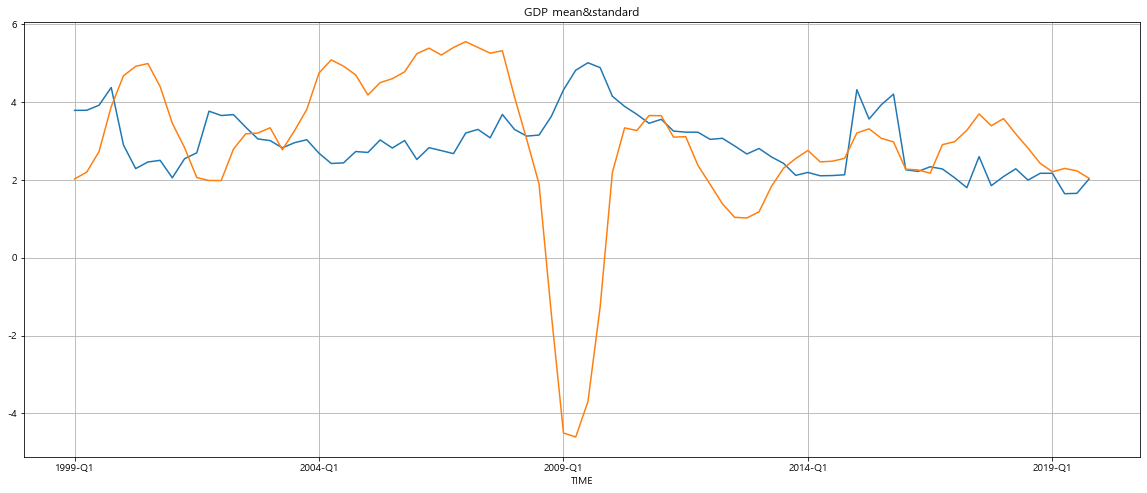

In [8]:
GDP_time_series_pivot.transpose().std().plot()
GDP_time_series_pivot.transpose().mean().plot()
plt.grid(True)
plt.title('GDP mean&standard')

In [9]:
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

style.use('seaborn-talk')


In [10]:

def show_line(w1,w2):
    xb=np.linspace(X_min,X_max,100)
    y=w1*xb+w2
    plt.plot(xb,y,color=(.5,.5,.5),linewidth=4)
def show_line2(w1,w2):
    xb=np.linspace(X_min,X_max,100)
    y=w1*xb+w2
    plt.plot(xb,y,color='w',linewidth=4)

In [11]:
def mse_line(x,t,w):
    y=w[0]*x+w[1]
    mse=np.mean((y-t)**2)
    #mse=np.mean(np.abs(y-t))
    return mse
def standard_deviation(mse):
    return mse**(1/2)
def dmse_line(x,t,w):
    y=w[0]*x+w[1]
    d_w0=2*np.mean((y-t)*x)
    d_w1=2*np.mean(y-t)
    return d_w0,d_w1
def fit_line_num(x,t):
    w_init=[10.0,10.0]
    alpha=0.0001
    i_max=100000
    eps=0.1
    w_i=np.zeros([i_max,2])
    w_i[0,:]=w_init
    for i in range(1,i_max):
        dmse=dmse_line(x,t,w_i[i-1])
        w_i[i,0]=w_i[i-1,0]-alpha*dmse[0]
        w_i[i,1]=w_i[i-1,1]-alpha*dmse[1]
        if max(np.absolute(dmse))<eps:
            break
    
    w0=w_i[i,0]
    w1=w_i[i,1]
    w_i=w_i[:i,:]
    return w0,w1
def fit_line(x,t):
    mx=np.mean(x)
    mt=np.mean(t)
    mtx=np.mean(t*x)
    mxx=np.mean(x*x)
    w0=(mtx-mt*mx)/(mxx-mx**2)
    w1=mt - w0*mx
    return np.array([w0,w1])
def show_data2(ax,x0,x1,t):
    for i in range(len(x0)):
        ax.plot([x0[i],x0[i]],[x1[i],x1[i]],[120,t[i]],color='gray')
        ax.plot(x0,x1,t,'o',color='cornflowerblue',markeredgecolor='black',markersize=6,markeredgewidth=0.5)
        ax.view_init(elev=35,azim=-75)
        

In [12]:
import sympy as sp

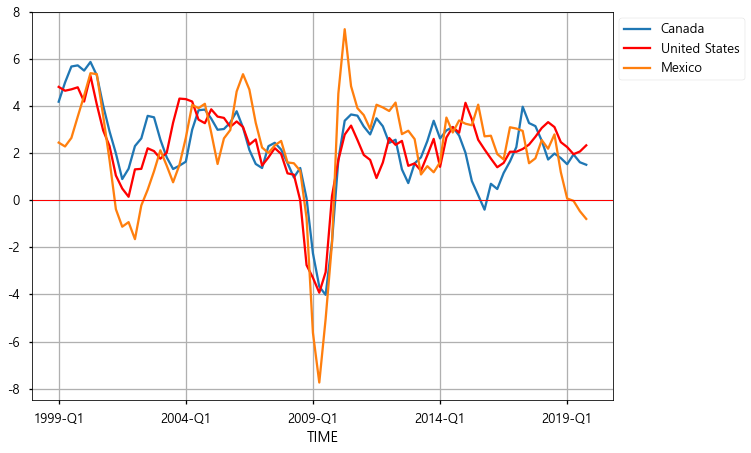

In [13]:

GDP_time_series_pivot['Canada'].plot()
GDP_time_series_pivot['United States'].plot(color='r')
GDP_time_series_pivot['Mexico'].plot()
plt.axhline(y=0, color='r', linewidth=1)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

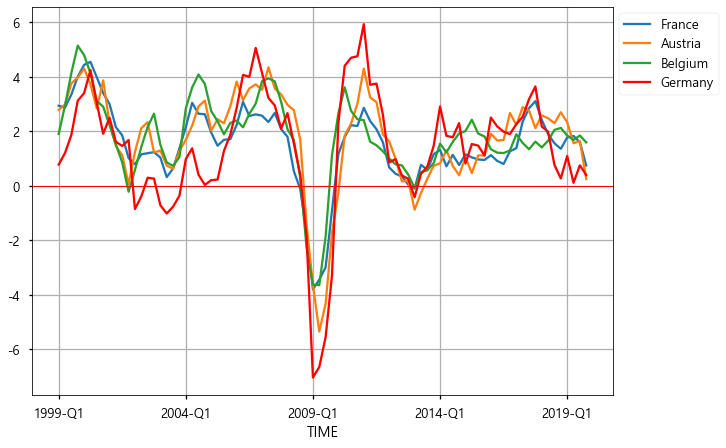

In [14]:
GDP_time_series_pivot['France'].plot()
GDP_time_series_pivot['Austria'].plot()
GDP_time_series_pivot['Belgium'].plot()
GDP_time_series_pivot['Germany'].plot(color='r')
plt.axhline(y=0, color='r', linewidth=1)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

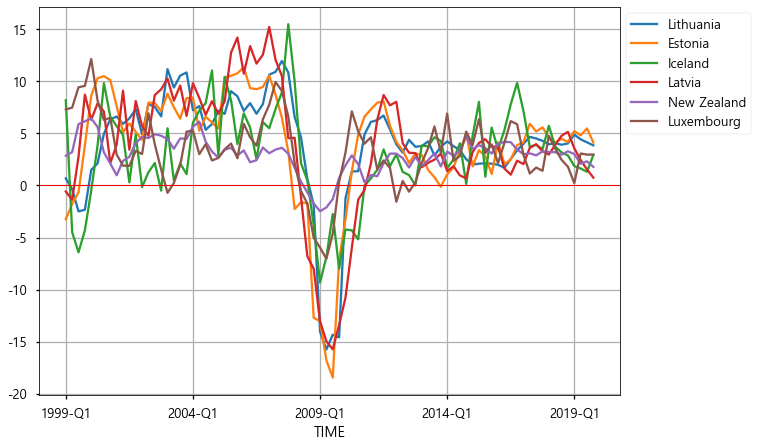

In [15]:

GDP_time_series_pivot['Lithuania'].plot()
GDP_time_series_pivot['Estonia'].plot()
GDP_time_series_pivot['Iceland'].plot()
GDP_time_series_pivot['Latvia'].plot()
GDP_time_series_pivot['New Zealand'].plot()
GDP_time_series_pivot['Luxembourg'].plot()
plt.axhline(y=0, color='r', linewidth=1)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [16]:
cluster =pd.read_csv('./data/cluster_id.csv')
cluster.columns=['Country','cluster']
cluster=cluster.set_index('Country')
cluster=cluster.loc[sorted(['Slovenia','Lithuania','Romania','Argentina','Estonia','Latvia','Slovak Republic','Finland','Hungary','Mexico','Czech Republic','Bulgaria','Turkey','Germany','Austria','Brazil','Netherlands','Chile','Switzerland','Denmark','United Kingdom','Italy','South Africa','Sweden','Japan','Spain','Belgium','United States','Canada','Portugal','Israel','France','Poland','Norway','China','New Zealand','Greece','India','Indonesia','Ireland','Australia','Korea, Rep.'])]

cluster

,cluster
Country,
Argentina,Asia & America
Australia,Asia & America
Austria,West EU
Belgium,West EU
Brazil,Asia & America
Bulgaria,West EU
Canada,Asia & America
Chile,Asia & America
China,Asia & America


In [17]:
pagerank = pd.read_csv('./data/pagerank.csv',encoding='CP949')
pagerank['rank']=pagerank['Value'].rank()
pagerank.columns=['Country','Value','rank']
pagerank=pagerank.set_index('Country')
pagerank

,Value,rank
Country,,
Argentina,0.004957,12.0
Australia,0.012601,28.0
Austria,0.015315,31.0
Belgium,0.036102,37.0
Brazil,0.012480,27.0
Bulgaria,0.002663,5.0
Canada,0.049605,42.0
Chile,0.004575,10.0
China,0.043383,38.0


In [18]:
pagerank=pd.Series.to_frame(pagerank['Value'])
pagerank=pagerank.loc[['Slovenia','Lithuania','Romania','Argentina','Estonia','Latvia','Slovak Republic','Finland','Hungary','Mexico','Czech Republic','Bulgaria','Turkey','Germany','Austria','Brazil','Netherlands','Chile','Switzerland','Denmark','United Kingdom','Italy','South Africa','Sweden','Japan','Spain','Belgium','United States','Canada','Portugal','Israel','France','Poland','Norway','China','New Zealand','Greece','India','Indonesia','Ireland','Australia','Korea, Rep.']]
pagerank=pagerank.sort_index()
pagerank['cluster_id']=cluster.cluster.values
pagerank

,Value,cluster_id
Country,,
Argentina,0.004957,Asia & America
Australia,0.012601,Asia & America
Austria,0.015315,West EU
Belgium,0.036102,West EU
Brazil,0.012480,Asia & America
Bulgaria,0.002663,West EU
Canada,0.049605,Asia & America
Chile,0.004575,Asia & America
China,0.043383,Asia & America


In [19]:
pagerank

,Value,cluster_id
Country,,
Argentina,0.004957,Asia & America
Australia,0.012601,Asia & America
Austria,0.015315,West EU
Belgium,0.036102,West EU
Brazil,0.012480,Asia & America
Bulgaria,0.002663,West EU
Canada,0.049605,Asia & America
Chile,0.004575,Asia & America
China,0.043383,Asia & America


In [20]:
GDP_time_series_pivot=GDP_time_series_pivot.transpose()
GDP_time_series_pivot=GDP_time_series_pivot.loc[sorted(['Slovenia','Lithuania','Romania','Argentina','Estonia','Latvia','Slovak Republic','Finland','Hungary','Mexico','Czech Republic','Bulgaria','Turkey','Germany','Austria','Brazil','Netherlands','Chile','Switzerland','Denmark','United Kingdom','Italy','South Africa','Sweden','Japan','Spain','Belgium','United States','Canada','Portugal','Israel','France','Poland','Norway','China','New Zealand','Greece','India','Indonesia','Ireland','Australia','Korea, Rep.'])]
        
GDP_time_series_pivot['cluster_id']=cluster.cluster

In [21]:
GDP_time_series_pivot['cluster_id']

Country
Argentina          Asia & America
Australia          Asia & America
Austria                   West EU
Belgium                   West EU
Brazil             Asia & America
Bulgaria                  West EU
Canada             Asia & America
Chile              Asia & America
China              Asia & America
Czech Republic            West EU
Denmark                   East EU
Estonia                   East EU
Finland                   East EU
France                    West EU
Germany                   West EU
Greece                    West EU
Hungary                   West EU
India              Asia & America
Indonesia          Asia & America
Ireland                   West EU
Israel                    West EU
Italy                     West EU
Japan              Asia & America
Korea, Rep.        Asia & America
Latvia                    East EU
Lithuania                 East EU
Mexico             Asia & America
Netherlands               West EU
New Zealand        Asia & America
Norway

In [22]:
w_eu=[i for i in c_list if GDP_time_series_pivot.loc[i]['cluster_id']=='West EU']
aa=[i for i in c_list if GDP_time_series_pivot.loc[i]['cluster_id']=='Asia & America']
e_eu=[i for i in c_list if GDP_time_series_pivot.loc[i]['cluster_id']=='East EU']
GDP_time_series_pivot=GDP_time_series_pivot.transpose().drop(['cluster_id'])

In [23]:
GDP_time_series_pivot

Country,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Czech Republic,...,Romania,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
TIME,,,,,,,,,,,,,,,,,,,,,
1999-Q1,-2.17649,5.32642,2.78613,1.9048,0.686829,-9.36322,4.1941,-2.3451,8.9,0.399779,...,-2.40615,3.08881,4.03376,0.938259,4.2352,4.31136,0.991291,-4.09002,3.22558,4.82407
1999-Q2,-5.14058,4.64952,2.98439,2.95668,-0.437704,-5.58927,5.00966,-3.99974,7.9,0.510534,...,-1.47392,1.32902,7.6889,1.5979,4.29501,3.43854,0.657381,-3.86492,2.4539,4.66137
1999-Q3,-5.12492,3.86877,3.76279,4.14759,-0.455957,-7.1022,5.69071,-1.13797,7.6,1.49974,...,0.55761,1.50895,4.02742,2.93305,4.69249,3.70093,1.13709,-4.1375,3.47996,4.72039
1999-Q4,-1.01442,4.02481,3.97124,5.14565,2.12953,-10.8329,5.73871,4.74677,6.7,2.513,...,1.18367,-5.9518,5.05154,3.9645,4.72958,4.54931,3.92239,-1.01763,4.00721,4.80665
2000-Q1,-0.106447,3.61597,4.30573,4.79824,3.00672,-0.806751,5.51637,5.47072,8.7,3.82259,...,2.70023,-1.68798,4.43707,4.17594,5.35299,4.05118,4.5183,2.26521,4.23136,4.19958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-Q4,-6.23763,2.182,2.70143,2.12588,0.763516,3.47607,1.79762,3.0335,6.5,2.59481,...,3.97681,3.33978,3.88965,0.170416,2.25355,1.93261,2.11453,-2.61596,1.21959,2.47552
2019-Q1,-5.98532,1.6999,2.33423,1.84811,0.773836,4.16604,1.53769,1.88805,6.4,2.44935,...,5.35576,3.14412,4.56978,0.0485102,2.22573,1.72453,1.16221,-2.43129,1.70719,2.2658
2019-Q2,-1.35217,1.55747,1.5644,1.68226,1.4438,3.81206,1.95322,1.8534,6.2,2.37396,...,3.57815,2.37788,3.17122,0.998119,2.08091,0.99226,0.559525,-0.916366,1.30134,1.96316


c:\users\ksy\anaconda3\envs\py368\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


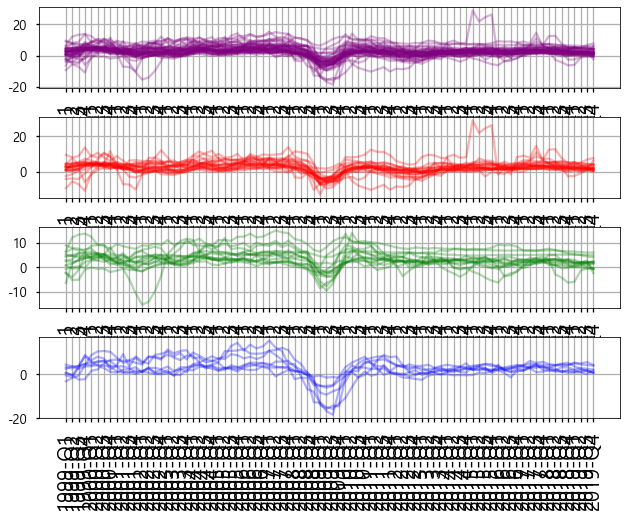

In [24]:


import matplotlib.ticker as ticker
fig = plt.figure()
plt.rcParams["figure.figsize"] = (20,10)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)

ax1.plot(GDP_time_series_pivot,color='purple', alpha=0.3)

ax1.set_xticklabels(GDP_time_series_pivot.transpose().columns, rotation=90, fontsize=20)

ax2.plot(GDP_time_series_pivot[w_eu],'r', alpha=0.3)

ax2.set_xticklabels(GDP_time_series_pivot.transpose().columns, rotation=90, fontsize=20)
ax3.plot(GDP_time_series_pivot[aa],'g', alpha=0.3)
ax3.set_xticklabels(GDP_time_series_pivot.transpose().columns, rotation=90, fontsize=20)

ax4.plot(GDP_time_series_pivot[e_eu],'b', alpha=0.3)
ax4.set_xticklabels(GDP_time_series_pivot.transpose().columns, rotation=90, fontsize=20)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
plt.show()

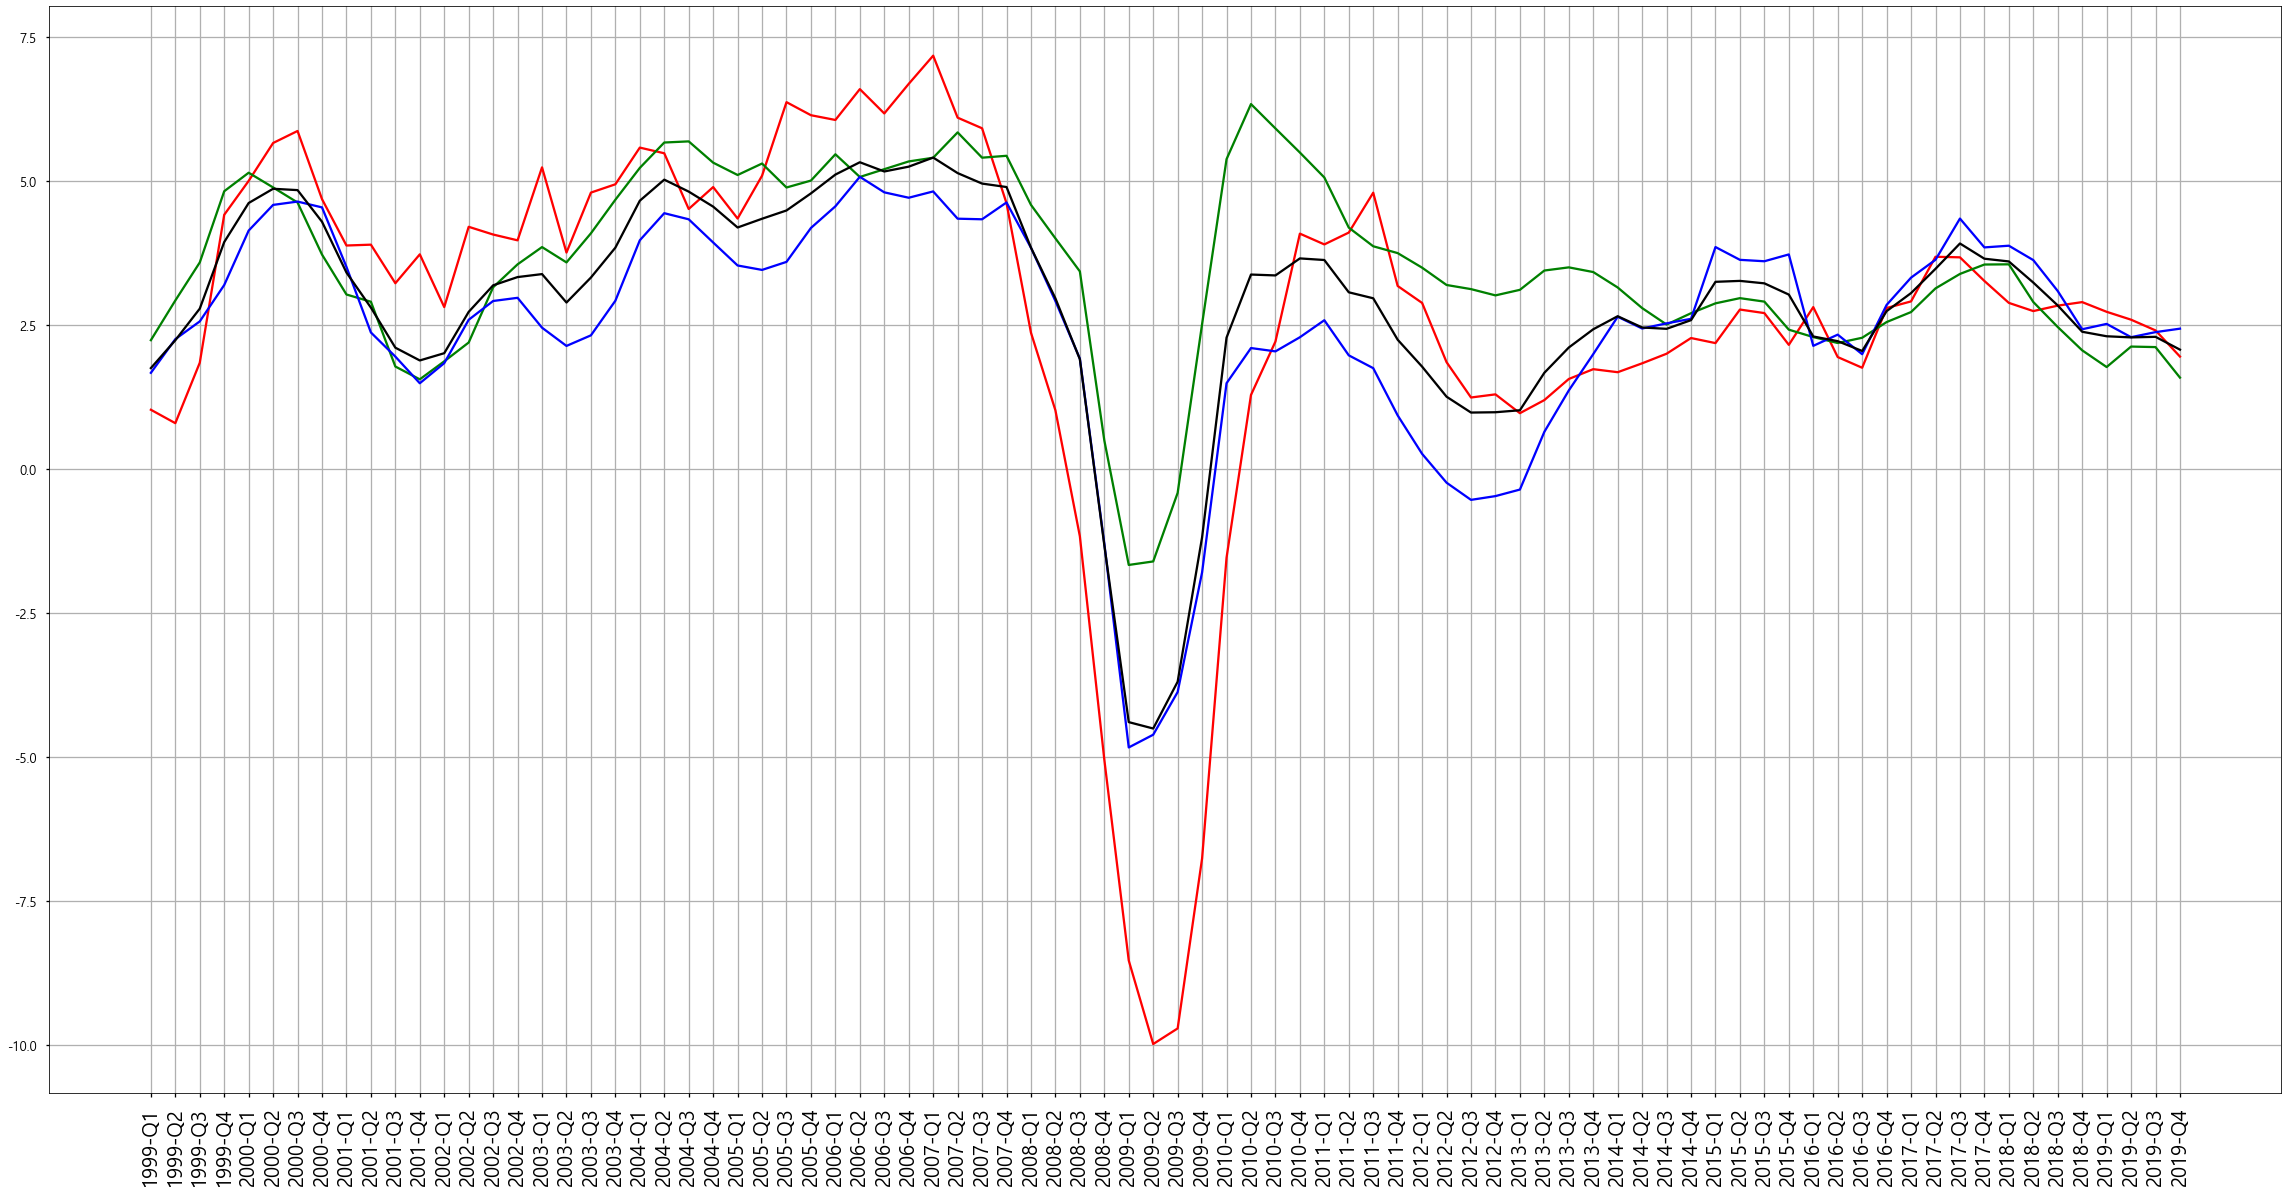

In [25]:
GDP_time_series_pivot=GDP_time_series_pivot.transpose()
plt.rcParams["figure.figsize"] = (40,20)

plt.plot(np.mean(GDP_time_series_pivot.loc[e_eu]),'r')
plt.plot(np.mean(GDP_time_series_pivot.loc[aa]),'g')
plt.plot(np.mean(GDP_time_series_pivot.loc[w_eu]),'b')

plt.plot(np.mean(GDP_time_series_pivot),'k')
plt.xticks(fontsize=20,rotation =90)
plt.grid(True)
plt.show()

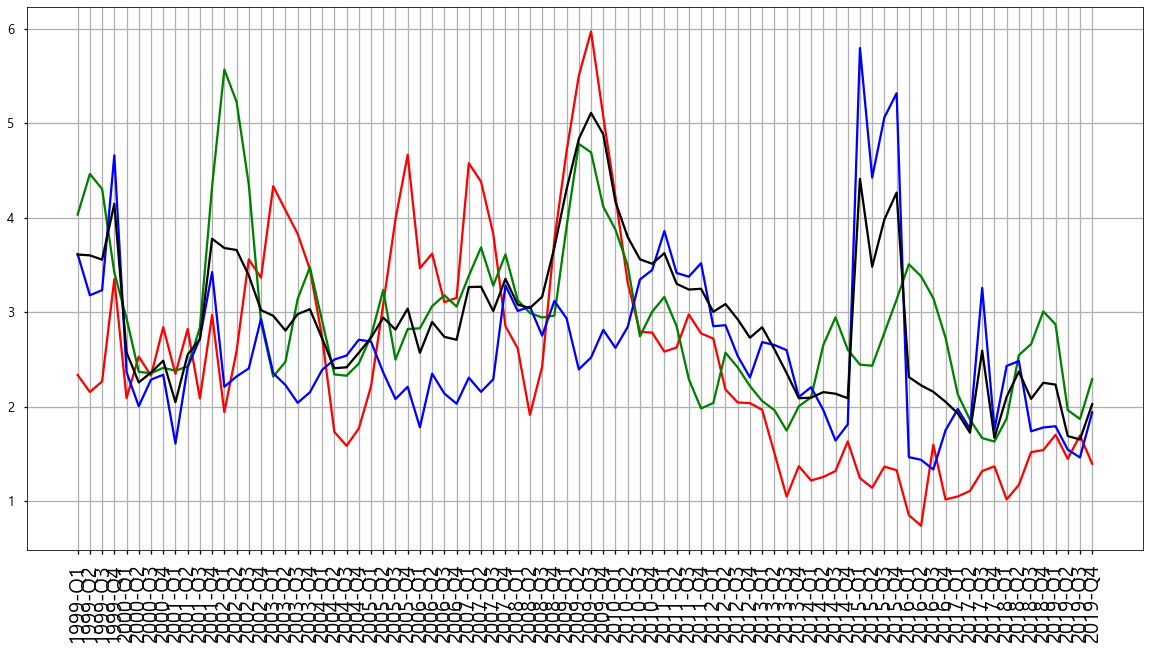

In [26]:

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(np.std(GDP_time_series_pivot.loc[e_eu]),'r')
plt.plot(np.std(GDP_time_series_pivot.loc[aa]),'g')
plt.plot(np.std(GDP_time_series_pivot.loc[w_eu]),'b')
plt.plot(np.std(GDP_time_series_pivot),'k')
plt.xticks(fontsize=20,rotation =90)
plt.grid(True)
plt.show()

In [27]:
GDP_time_series_pivot=GDP_time_series_pivot.transpose()

In [28]:
GDP_volume = pd.read_csv('./data/world GDP.csv',encoding='CP949')
GDP_volume=GDP_volume.set_index('Country')

c_list =list(['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Romania','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States'])
for i in GDP_volume.index:
    if i not in c_list:
        GDP_volume=GDP_volume.drop(i)
GDP_volume=pd.DataFrame(GDP_volume.mean(axis=1))
GDP_volume.columns=['value']

In [29]:
GDP_volume

,value
Country,
Argentina,2.035995e+11
Australia,4.511172e+11
Austria,1.784678e+11
Belgium,2.197720e+11
Bulgaria,3.039374e+10
Brazil,6.988983e+11
Canada,6.711232e+11
Switzerland,2.645514e+11
Chile,8.136243e+10


c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'GDP & STD')

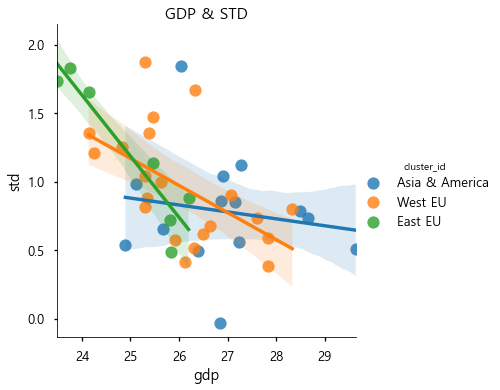

In [30]:
data = pd.concat([np.log(GDP_volume),np.log(GDP_time_series_pivot.std())],axis=1)
data.columns=['gdp','std']
data['cluster_id']=cluster
sns.lmplot('gdp','std',data=data,fit_reg=True,scatter_kws={"s":150},hue="cluster_id")
plt.title('GDP & STD')

In [31]:
virtual_data=pd.read_csv('./data/influ.csv')
virtual_data=virtual_data.set_index('country')

In [32]:
virtual_data

,from_influ,to_influ,kr_influ
country,,,
Argentina,1.037180e+12,2.475490e+15,1.478690e+12
Australia,1.036620e+12,5.221290e+15,1.474310e+12
Austria,1.037380e+12,1.426090e+15,1.479580e+12
Belgium,1.037220e+12,2.146910e+15,1.478580e+12
Brazil,1.036370e+12,6.590650e+15,1.474460e+12
Bulgaria,1.037620e+12,3.033210e+14,1.480890e+12
Canada,1.036750e+12,4.529250e+15,1.475710e+12
Chile,1.037480e+12,1.023870e+15,1.479930e+12
China,1.029850e+12,3.890000e+16,1.419650e+12


c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'GDP & influ')

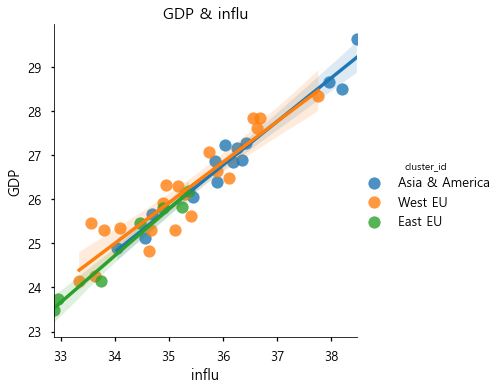

In [33]:
data = pd.concat([np.log(virtual_data.to_influ),np.log(GDP_volume)],axis=1)
data.columns=['influ','GDP']
data['cluster_id']=cluster
sns.lmplot('influ','GDP',data=data,fit_reg=True,scatter_kws={"s":150},hue="cluster_id")
plt.title('GDP & influ')

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'GDP & STD')

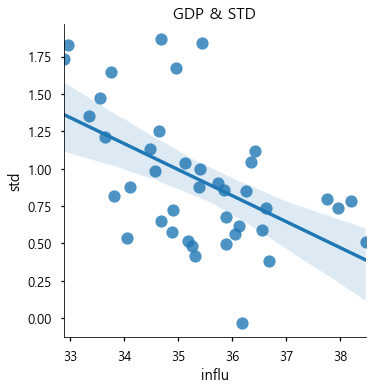

In [34]:
data = pd.concat([np.log(virtual_data.to_influ.sort_values()),np.log(GDP_time_series_pivot.std())],axis=1)
data.columns=['influ','std']
data=data.sort_index()
data['cluster_id']=cluster
sns.lmplot('influ','std',data=data,fit_reg=True,scatter_kws={"s":150})
plt.title('GDP & STD')

In [35]:

print('West Europe std',GDP_time_series_pivot[w_eu].std(axis=1).mean())
print('Asia&America std',GDP_time_series_pivot[aa].std(axis=1).mean())
print('East Europe std',GDP_time_series_pivot[e_eu].std(axis=1).mean())
print('world std',GDP_time_series_pivot.std(axis=1).mean())

West Europe std 2.6591036762583733
Asia&America std 3.0296197276360894
East Europe std 2.698937629606943
world std 2.9693944245016324


In [36]:
GDP_time_series_pivot

Country,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Czech Republic,...,Romania,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
TIME,,,,,,,,,,,,,,,,,,,,,
1999-Q1,-2.17649,5.32642,2.78613,1.9048,0.686829,-9.36322,4.1941,-2.3451,8.9,0.399779,...,-2.40615,3.08881,4.03376,0.938259,4.2352,4.31136,0.991291,-4.09002,3.22558,4.82407
1999-Q2,-5.14058,4.64952,2.98439,2.95668,-0.437704,-5.58927,5.00966,-3.99974,7.9,0.510534,...,-1.47392,1.32902,7.6889,1.5979,4.29501,3.43854,0.657381,-3.86492,2.4539,4.66137
1999-Q3,-5.12492,3.86877,3.76279,4.14759,-0.455957,-7.1022,5.69071,-1.13797,7.6,1.49974,...,0.55761,1.50895,4.02742,2.93305,4.69249,3.70093,1.13709,-4.1375,3.47996,4.72039
1999-Q4,-1.01442,4.02481,3.97124,5.14565,2.12953,-10.8329,5.73871,4.74677,6.7,2.513,...,1.18367,-5.9518,5.05154,3.9645,4.72958,4.54931,3.92239,-1.01763,4.00721,4.80665
2000-Q1,-0.106447,3.61597,4.30573,4.79824,3.00672,-0.806751,5.51637,5.47072,8.7,3.82259,...,2.70023,-1.68798,4.43707,4.17594,5.35299,4.05118,4.5183,2.26521,4.23136,4.19958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-Q4,-6.23763,2.182,2.70143,2.12588,0.763516,3.47607,1.79762,3.0335,6.5,2.59481,...,3.97681,3.33978,3.88965,0.170416,2.25355,1.93261,2.11453,-2.61596,1.21959,2.47552
2019-Q1,-5.98532,1.6999,2.33423,1.84811,0.773836,4.16604,1.53769,1.88805,6.4,2.44935,...,5.35576,3.14412,4.56978,0.0485102,2.22573,1.72453,1.16221,-2.43129,1.70719,2.2658
2019-Q2,-1.35217,1.55747,1.5644,1.68226,1.4438,3.81206,1.95322,1.8534,6.2,2.37396,...,3.57815,2.37788,3.17122,0.998119,2.08091,0.99226,0.559525,-0.916366,1.30134,1.96316


In [37]:

print('eu corr',np.mean(np.corrcoef(GDP_time_series_pivot.transpose().loc[w_eu].astype(float))))
print('aa corr',np.mean(np.corrcoef(GDP_time_series_pivot.transpose().loc[aa].astype(float))))
print('rest corr',np.mean(np.corrcoef(GDP_time_series_pivot.transpose().loc[e_eu].astype(float))))
print('world corr',np.mean(np.corrcoef(GDP_time_series_pivot.transpose().astype(float))))

eu corr 0.5362764677611345
aa corr 0.40338982137063417
rest corr 0.6901190184329282
world corr 0.4555910765188319


In [38]:

print('eu std',np.mean(np.std(GDP_time_series_pivot.transpose().loc[w_eu].astype(float))))
print('aa std',np.mean(np.std(GDP_time_series_pivot.transpose().loc[aa].astype(float))))
print('rest std',np.mean(np.std(GDP_time_series_pivot.transpose().loc[e_eu].astype(float))))
print('world std',np.mean(np.std(GDP_time_series_pivot.transpose().astype(float))))

eu std 2.59501947163826
aa std 2.919414618709215
rest std 2.498730705522593
world std 2.9338315317407204


In [39]:
print(w_eu)

['Austria', 'Belgium', 'Bulgaria', 'Czech Republic', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Israel', 'Italy', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Spain', 'Switzerland', 'Turkey', 'United Kingdom']


In [40]:
GDP_time_series=pd.read_csv('./data/GDP_time_series.csv')
GDP_time_series=GDP_time_series.set_index('Country')

In [41]:
GDP_time_series

,1999-Q1,1999-Q2,1999-Q3,1999-Q4,2000-Q1,2000-Q2,2000-Q3,2000-Q4,2001-Q1,2001-Q2,...,2017-Q3,2017-Q4,2018-Q1,2018-Q2,2018-Q3,2018-Q4,2019-Q1,2019-Q2,2019-Q3,2019-Q4
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,-2.176492,-5.140582,-5.124917,-1.014421,-0.106447,-0.590391,-0.557525,-1.893524,-1.397726,-0.616979,...,3.824631,4.314799,3.147601,-2.841412,-4.175373,-6.237631,-5.985322,-1.352171,-0.450371,-0.334089
Australia,5.326421,4.649523,3.868774,4.024807,3.615974,4.221489,3.217333,1.108088,1.756605,1.666696,...,2.981790,2.436992,3.074340,3.265168,2.558758,2.181997,1.699904,1.557471,1.824480,2.279479
Austria,2.786131,2.984391,3.762787,3.971240,4.305731,3.726557,2.835723,3.867669,2.292867,1.463226,...,2.757890,2.119404,2.585594,2.482769,2.297360,2.701435,2.334227,1.564396,1.647827,0.249999
Belgium,1.904799,2.956681,4.147585,5.145646,4.798243,4.127696,3.112977,2.902469,2.233500,1.521366,...,1.343801,1.623358,1.412683,1.653093,2.054852,2.125884,1.848108,1.682255,1.849580,1.595947
Brazil,0.686829,-0.437704,-0.455957,2.129526,3.006717,3.961983,5.192913,4.995566,4.215693,2.303956,...,1.996414,2.399980,1.785476,0.797570,1.463114,0.763516,0.773836,1.443798,0.691144,1.621077
Bulgaria,-9.363217,-5.589268,-7.102201,-10.832917,-0.806751,2.800887,4.514287,11.520865,3.441619,3.515834,...,3.664521,3.231821,3.005582,3.092118,3.323992,3.476067,4.166038,3.812065,3.318156,3.086850
Canada,4.194104,5.009661,5.690714,5.738707,5.516373,5.884752,5.313761,4.030670,2.934982,2.000025,...,3.286158,3.156516,2.536087,1.736942,1.991788,1.797621,1.537689,1.953218,1.619975,1.514251
Chile,-2.345097,-3.999743,-1.137974,4.746772,5.470719,5.163415,4.137394,3.133435,3.909925,4.749313,...,2.260985,2.792307,4.974790,5.025451,2.987171,3.033499,1.888051,1.853398,2.773016,-2.389012
China,8.900000,7.900000,7.600000,6.700000,8.700000,9.100000,8.800000,7.500000,9.500000,8.600000,...,6.900000,6.800000,6.900000,6.900000,6.700000,6.500000,6.400000,6.200000,6.000000,6.000000


In [42]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np


def lag_finder(y1, y2, sr):
    n = len(y1)

    corr = signal.correlate(y1, y2, mode='same') / np.sqrt(signal.correlate(y1, y1, mode='same')[int(n/2)] * signal.correlate(y2, y2, mode='same')[int(n/2)])
    
    delay_arr = np.linspace(-2*n/sr, 2*n/sr, n)
    delay = delay_arr[np.argmax(corr)]
    return (delay-0.024096).round(6),np.max(corr)

# Sine sample with some noise and copy to y1 and y2 with a 1-second lag
sr = 1024

In [43]:
c1=[]
c2=[]
delay=[]
delay_corr=[]
corr=[]
sr=84
for i in c_list:
    for j in c_list:
        c1.append(i)
        c2.append(j)
        delay.append(lag_finder(GDP_time_series.loc[i], GDP_time_series.loc[j], sr)[0])
        delay_corr.append(lag_finder(GDP_time_series.loc[i], GDP_time_series.loc[j], sr)[1])
        corr.append(np.corrcoef(GDP_time_series.loc[i], GDP_time_series.loc[j])[0][1])
time_delay=pd.concat([pd.DataFrame(c1),pd.DataFrame(c2),pd.DataFrame(delay)],axis=1)
time_delay_corr=pd.concat([pd.DataFrame(c1),pd.DataFrame(c2),pd.DataFrame(delay_corr)],axis=1)
corr=pd.concat([pd.DataFrame(c1),pd.DataFrame(c2),pd.DataFrame(corr)],axis=1)

In [44]:
time_delay

,0,0,0
0,Argentina,Argentina,0.000000
1,Argentina,Australia,0.722892
2,Argentina,Austria,-0.048192
3,Argentina,Belgium,0.048193
4,Argentina,Brazil,0.048193
...,...,...,...
1759,United States,Sweden,0.000000
1760,United States,Switzerland,-0.048192
1761,United States,Turkey,0.000000
1762,United States,United Kingdom,0.000000


In [45]:
time_delay.columns=['Country1','Country2','delay']
time_delay=pd.pivot_table(time_delay,index='Country1',columns='Country2',values='delay')
time_delay_corr.columns=['Country1','Country2','delay_corr']
time_delay_corr=pd.pivot_table(time_delay_corr,index='Country1',columns='Country2',values='delay_corr')

corr.columns=['Country1','Country2','corr']
corr=pd.pivot_table(corr,index='Country1',columns='Country2',values='corr')

In [46]:
pagerank

,Value,cluster_id
Country,,
Argentina,0.004957,Asia & America
Australia,0.012601,Asia & America
Austria,0.015315,West EU
Belgium,0.036102,West EU
Brazil,0.012480,Asia & America
Bulgaria,0.002663,West EU
Canada,0.049605,Asia & America
Chile,0.004575,Asia & America
China,0.043383,Asia & America


In [47]:
pagerank['w_eu']=np.std(GDP_time_series_pivot[w_eu]).mean()
pagerank['aa']=np.std(GDP_time_series_pivot[aa]).mean()
pagerank['e_eu']=np.std(GDP_time_series_pivot[e_eu]).mean()

In [48]:
from scipy.sparse import csr_matrix
Export = pd.read_csv('./data/WITS-Partner-Timeseries Export.csv',encoding='CP949')
Export = Export[Export['Reporter Name'].isin(['Slovenia','Lithuania','Romania','Argentina','Estonia','Latvia','Slovak Republic','Finland','Hungary','Mexico','Czech Republic','Bulgaria','Turkey','Germany','Austria','Brazil','Netherlands','Chile','Switzerland','Denmark','United Kingdom','Italy','South Africa','Sweden','Japan','Spain','Belgium','United States','Canada','Portugal','Israel','France','Poland','Norway','China','New Zealand','Greece','India','Indonesia','Ireland','Australia','Korea, Rep.'])]
Export = Export[Export['Partner Name'].isin(['Slovenia','Lithuania','Romania','Argentina','Estonia','Latvia','Slovak Republic','Finland','Hungary','Mexico','Czech Republic','Bulgaria','Turkey','Germany','Austria','Brazil','Netherlands','Chile','Switzerland','Denmark','United Kingdom','Italy','South Africa','Sweden','Japan','Spain','Belgium','United States','Canada','Portugal','Israel','France','Poland','Norway','China','New Zealand','Greece','India','Indonesia','Ireland','Australia','Korea, Rep.'])]
Export['value']=Export.mean(axis=1)
Export_pivot=pd.pivot_table(Export,index='Reporter Name',columns='Partner Name',values='value')
Export_pivot=Export_pivot.fillna(0)
csr_mat = csr_matrix(Export_pivot)
pageranked_Export_pivot=Export_pivot.copy()

In [49]:
Export_pivot

Partner Name,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Czech Republic,...,Romania,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Reporter Name,,,,,,,,,,,,,,,,,,,,,
Argentina,0.000000,0.509862,0.022204,0.736785,21.023919,0.084958,1.262442,7.349188,5.737308,0.046742,...,0.110762,0.007656,0.044072,1.191167,3.398777,0.105915,0.814515,0.548796,1.196369,8.428827
Australia,0.093342,0.000000,0.034281,0.596035,0.443177,0.025435,0.851039,0.135394,13.732445,0.050138,...,0.074213,0.003696,0.010204,0.716000,0.410232,0.197703,0.420923,0.287355,3.416390,6.231229
Austria,0.105400,0.558916,0.000000,1.439430,0.480792,0.436920,0.724052,0.085608,1.594112,3.240044,...,1.240192,1.649688,1.881124,0.392280,2.176724,1.128920,5.371824,0.816680,3.523008,5.043844
Belgium,0.123175,0.461175,1.014435,0.000000,0.607665,0.121460,0.612255,0.092815,1.427895,0.724720,...,0.291660,0.226855,0.134635,0.368935,3.199350,1.470855,1.386380,1.097630,8.310530,5.768185
Brazil,8.047203,0.431197,0.139043,2.094330,0.000000,0.094887,1.264547,2.289603,8.451400,0.042908,...,0.178363,0.044300,0.124374,0.703910,1.889200,0.338217,0.663440,0.506310,2.384007,17.528947
Bulgaria,0.065913,0.094870,1.761400,4.798070,0.188257,0.000000,0.407600,0.033017,1.188870,0.912287,...,5.374726,0.513643,0.622722,0.172100,2.705883,0.550243,0.768143,8.975217,2.376065,2.581139
Canada,0.060437,0.403273,0.085233,0.565375,0.400500,0.016260,0.000000,0.131980,2.145653,0.029792,...,0.023913,0.008016,0.012025,0.104993,0.244333,0.114667,0.303167,0.138943,2.406403,79.434097
Chile,2.513586,0.520400,0.064517,1.380065,5.149683,0.380662,1.490200,0.000000,12.531114,0.009740,...,0.024034,0.001540,0.004392,0.294262,2.271800,0.499821,0.564441,0.377983,3.450679,14.751445
China,0.272756,1.475030,0.117244,0.877090,0.868367,0.047544,1.300678,0.399000,0.000000,0.266138,...,0.155593,0.070054,0.055188,0.523044,0.924678,0.323563,0.235063,0.542011,2.348019,18.673348


In [50]:
import os
import sys
import sympy as sp
import scipy.sparse as sparse
from numpy.testing import assert_allclose
import unittest
from fast_pagerank import pagerank
from fast_pagerank import pagerank_power

In [51]:
for i in (c_list):
    arr2 = np.array(Export_pivot[i])
    pr=pagerank_power(csr_mat, p=0.85, personalize=arr2, tol=1e-6)
    pageranked_Export_pivot.loc[i]=pr

In [52]:
pageranked_Export_pivot=mean_norm(pageranked_Export_pivot.transpose())
Export_pivot=mean_norm(Export_pivot.transpose())


In [53]:
pageranked_Export_pivot

Reporter Name,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Czech Republic,...,Romania,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Partner Name,,,,,,,,,,,,,,,,,,,,,
Argentina,0.011046,0.005519,0.003416,0.004847,0.072153,0.004487,0.007989,0.077217,0.011349,0.003401,...,0.004070,0.003291,0.004188,0.016211,0.008777,0.003553,0.005909,0.005374,0.004478,0.007055
Australia,0.011721,0.025919,0.009289,0.011199,0.012282,0.009611,0.014624,0.012465,0.028606,0.009125,...,0.009592,0.008939,0.009541,0.018632,0.010560,0.009859,0.011293,0.010705,0.012862,0.013753
Austria,0.012104,0.012650,0.019896,0.016024,0.012595,0.021137,0.013285,0.011490,0.013030,0.030071,...,0.024995,0.030178,0.043907,0.016681,0.017404,0.015970,0.028649,0.017752,0.016082,0.012566
Belgium,0.030879,0.030170,0.034981,0.035344,0.030879,0.032725,0.031228,0.029505,0.030453,0.034288,...,0.034558,0.033394,0.034052,0.035032,0.037761,0.034740,0.036983,0.036210,0.038684,0.030955
Brazil,0.084573,0.012022,0.009391,0.012840,0.027770,0.010527,0.015711,0.049941,0.021994,0.008938,...,0.010217,0.009038,0.011157,0.020104,0.013749,0.009705,0.012024,0.011469,0.011415,0.016841
Bulgaria,0.002288,0.001848,0.007118,0.008439,0.002296,0.005381,0.002714,0.001910,0.002945,0.005370,...,0.034593,0.005655,0.011667,0.003528,0.005978,0.002880,0.004116,0.031101,0.003590,0.002359
Canada,0.045132,0.045527,0.034075,0.038889,0.044757,0.034679,0.054947,0.045564,0.046479,0.033129,...,0.034147,0.032755,0.034785,0.042236,0.037371,0.035351,0.038652,0.036720,0.039554,0.072028
Chile,0.028282,0.005384,0.003047,0.005159,0.025908,0.007125,0.008279,0.010680,0.018017,0.002843,...,0.003094,0.002804,0.003104,0.007496,0.006856,0.003853,0.004840,0.004405,0.005442,0.008441
China,0.048134,0.052367,0.031779,0.035792,0.046826,0.032688,0.044288,0.048276,0.048913,0.031648,...,0.032380,0.031249,0.033168,0.045222,0.035610,0.032655,0.035292,0.035447,0.036445,0.045883


In [54]:
time_delay_corr

Country2,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Czech Republic,...,Romania,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Country1,,,,,,,,,,,,,,,,,,,,,
Argentina,1.000000,0.465510,0.443355,0.483416,0.575225,0.628807,0.471766,0.593324,0.446340,0.560943,...,0.451079,0.573922,0.402815,0.521880,0.473087,0.500316,0.528383,0.650157,0.456496,0.451715
Australia,0.465510,1.000000,0.756560,0.812066,0.656102,0.720003,0.827272,0.832358,0.947961,0.724773,...,0.750037,0.743235,0.668102,0.855082,0.659738,0.736354,0.775202,0.691198,0.764544,0.835467
Austria,0.443355,0.756560,1.000000,0.918236,0.622503,0.704672,0.888100,0.773880,0.730847,0.866470,...,0.783834,0.783195,0.907669,0.842620,0.820242,0.908096,0.871998,0.690020,0.861915,0.865009
Belgium,0.483416,0.812066,0.918236,1.000000,0.684057,0.755553,0.892657,0.827069,0.794927,0.879694,...,0.741692,0.790764,0.838232,0.873584,0.821099,0.913358,0.886403,0.710351,0.867714,0.917576
Brazil,0.575225,0.656102,0.622503,0.684057,1.000000,0.578345,0.662785,0.766528,0.712858,0.571672,...,0.575031,0.679918,0.573872,0.796403,0.621201,0.591182,0.703072,0.652707,0.623441,0.554924
Bulgaria,0.628807,0.720003,0.704672,0.755553,0.578345,1.000000,0.676787,0.781690,0.731478,0.836358,...,0.807996,0.822533,0.717100,0.782215,0.738683,0.716471,0.732302,0.665605,0.757577,0.746120
Canada,0.471766,0.827272,0.888100,0.892657,0.662785,0.676787,1.000000,0.784528,0.779684,0.788496,...,0.682571,0.679541,0.782227,0.859177,0.745061,0.865805,0.810700,0.694081,0.871713,0.917702
Chile,0.593324,0.832358,0.773880,0.827069,0.766528,0.781690,0.784528,1.000000,0.862203,0.782358,...,0.732238,0.788154,0.624327,0.899757,0.565305,0.795188,0.835954,0.808699,0.757757,0.807909
China,0.446340,0.947961,0.730847,0.794927,0.712858,0.731478,0.779684,0.862203,1.000000,0.765526,...,0.740294,0.803817,0.648485,0.881163,0.636778,0.734184,0.811628,0.695807,0.728045,0.787724


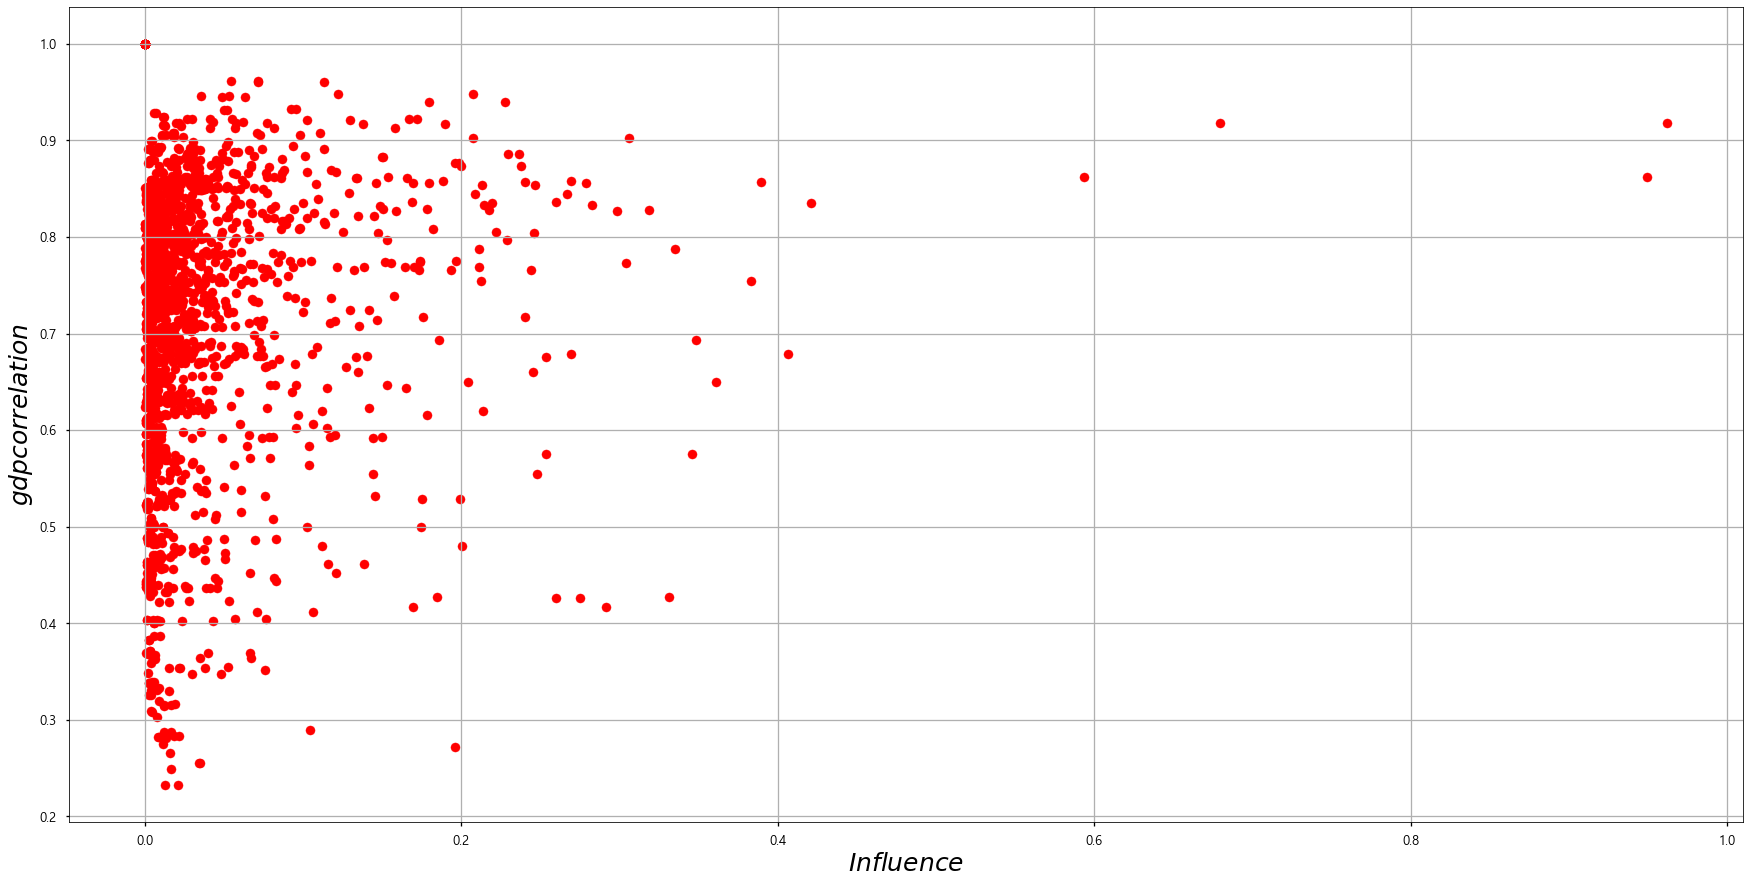

In [55]:
plt.rcParams["figure.figsize"] = (30,15)
plt.scatter((Export_pivot+Export_pivot.transpose()/2),time_delay_corr,color='red')
plt.ylabel('$gdp correlation$',fontsize=25)
plt.xlabel('$Influence$',fontsize=25)
plt.grid(True)

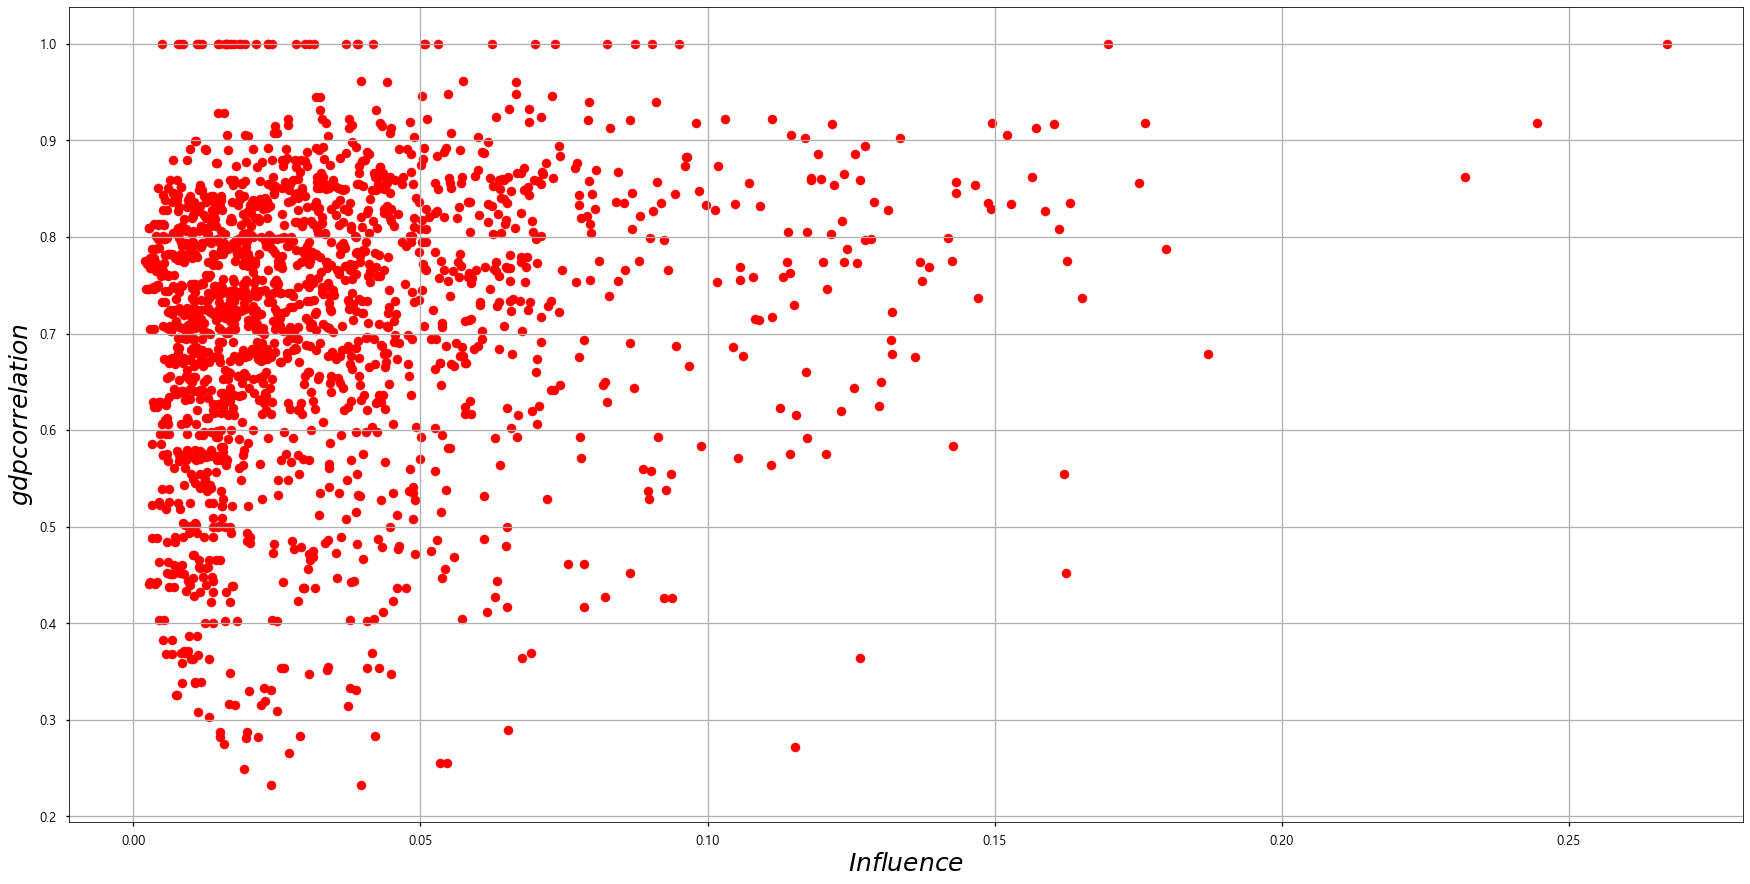

In [56]:
plt.rcParams["figure.figsize"] = (30,15)
plt.scatter((pageranked_Export_pivot+pageranked_Export_pivot.transpose()/2),time_delay_corr,color='red')
plt.ylabel('$gdp correlation$',fontsize=25)
plt.xlabel('$Influence$',fontsize=25)
plt.grid(True)

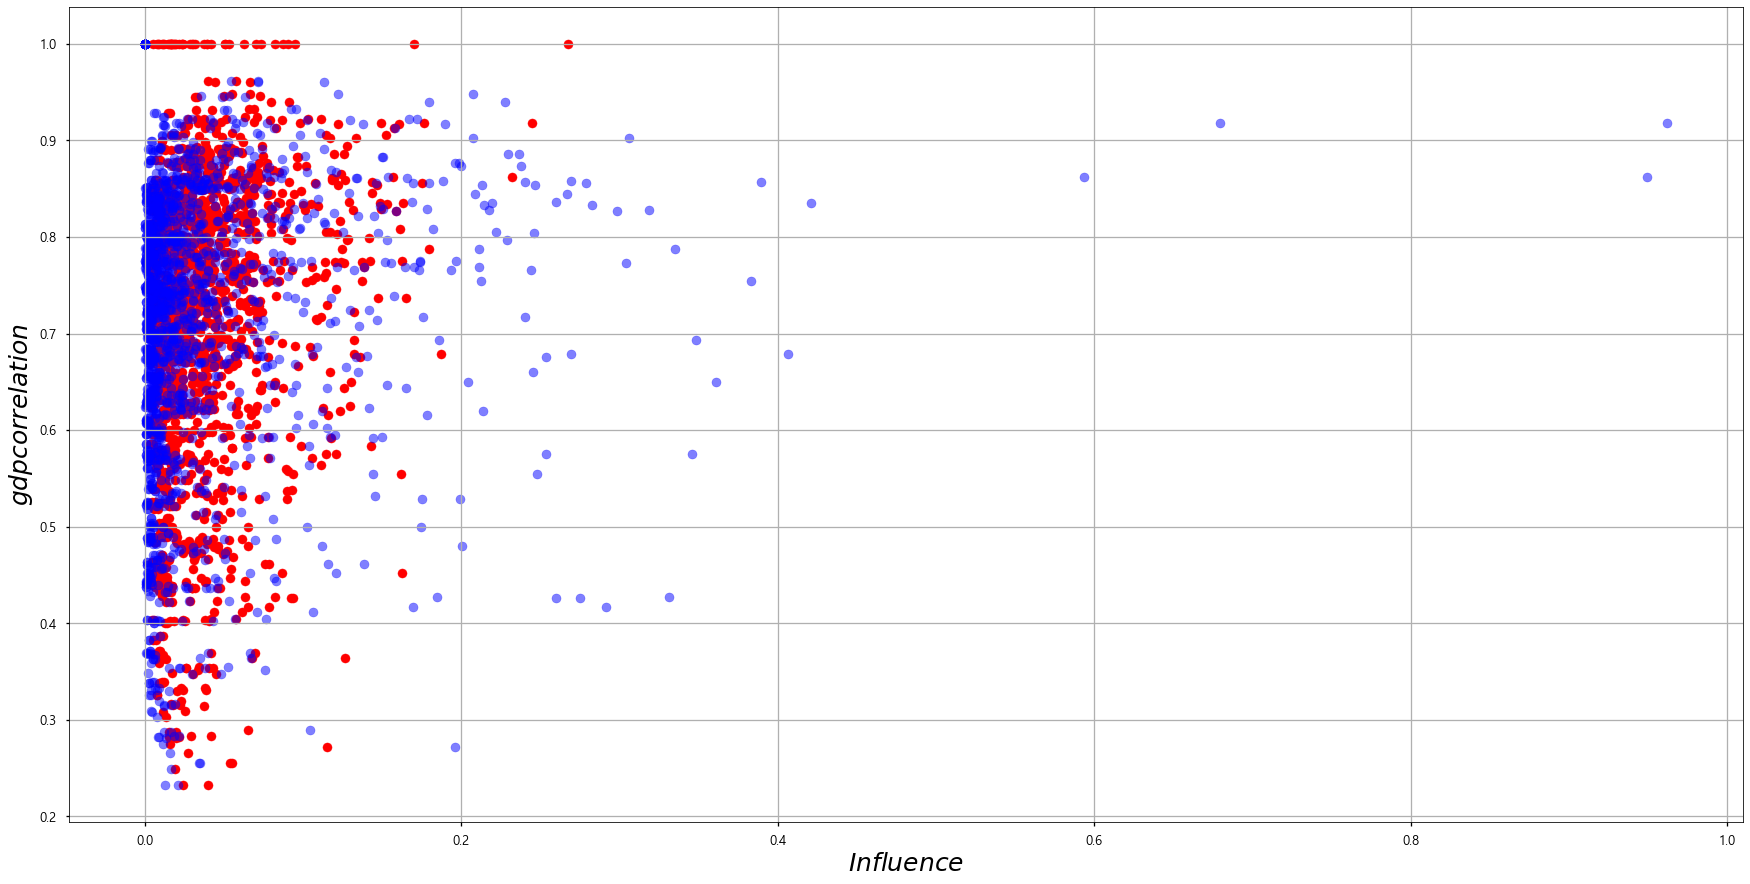

In [57]:
plt.rcParams["figure.figsize"] = (30,15)
plt.scatter((pageranked_Export_pivot+pageranked_Export_pivot.transpose()/2),time_delay_corr,color='red')
plt.scatter((Export_pivot+Export_pivot.transpose()/2),time_delay_corr,color='blue',alpha=0.5)
plt.ylabel('$gdp correlation$',fontsize=25)
plt.xlabel('$Influence$',fontsize=25)
plt.grid(True)

In [58]:
time_delay_corr

Country2,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Czech Republic,...,Romania,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Country1,,,,,,,,,,,,,,,,,,,,,
Argentina,1.000000,0.465510,0.443355,0.483416,0.575225,0.628807,0.471766,0.593324,0.446340,0.560943,...,0.451079,0.573922,0.402815,0.521880,0.473087,0.500316,0.528383,0.650157,0.456496,0.451715
Australia,0.465510,1.000000,0.756560,0.812066,0.656102,0.720003,0.827272,0.832358,0.947961,0.724773,...,0.750037,0.743235,0.668102,0.855082,0.659738,0.736354,0.775202,0.691198,0.764544,0.835467
Austria,0.443355,0.756560,1.000000,0.918236,0.622503,0.704672,0.888100,0.773880,0.730847,0.866470,...,0.783834,0.783195,0.907669,0.842620,0.820242,0.908096,0.871998,0.690020,0.861915,0.865009
Belgium,0.483416,0.812066,0.918236,1.000000,0.684057,0.755553,0.892657,0.827069,0.794927,0.879694,...,0.741692,0.790764,0.838232,0.873584,0.821099,0.913358,0.886403,0.710351,0.867714,0.917576
Brazil,0.575225,0.656102,0.622503,0.684057,1.000000,0.578345,0.662785,0.766528,0.712858,0.571672,...,0.575031,0.679918,0.573872,0.796403,0.621201,0.591182,0.703072,0.652707,0.623441,0.554924
Bulgaria,0.628807,0.720003,0.704672,0.755553,0.578345,1.000000,0.676787,0.781690,0.731478,0.836358,...,0.807996,0.822533,0.717100,0.782215,0.738683,0.716471,0.732302,0.665605,0.757577,0.746120
Canada,0.471766,0.827272,0.888100,0.892657,0.662785,0.676787,1.000000,0.784528,0.779684,0.788496,...,0.682571,0.679541,0.782227,0.859177,0.745061,0.865805,0.810700,0.694081,0.871713,0.917702
Chile,0.593324,0.832358,0.773880,0.827069,0.766528,0.781690,0.784528,1.000000,0.862203,0.782358,...,0.732238,0.788154,0.624327,0.899757,0.565305,0.795188,0.835954,0.808699,0.757757,0.807909
China,0.446340,0.947961,0.730847,0.794927,0.712858,0.731478,0.779684,0.862203,1.000000,0.765526,...,0.740294,0.803817,0.648485,0.881163,0.636778,0.734184,0.811628,0.695807,0.728045,0.787724


c:\users\ksy\anaconda3\envs\py368\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


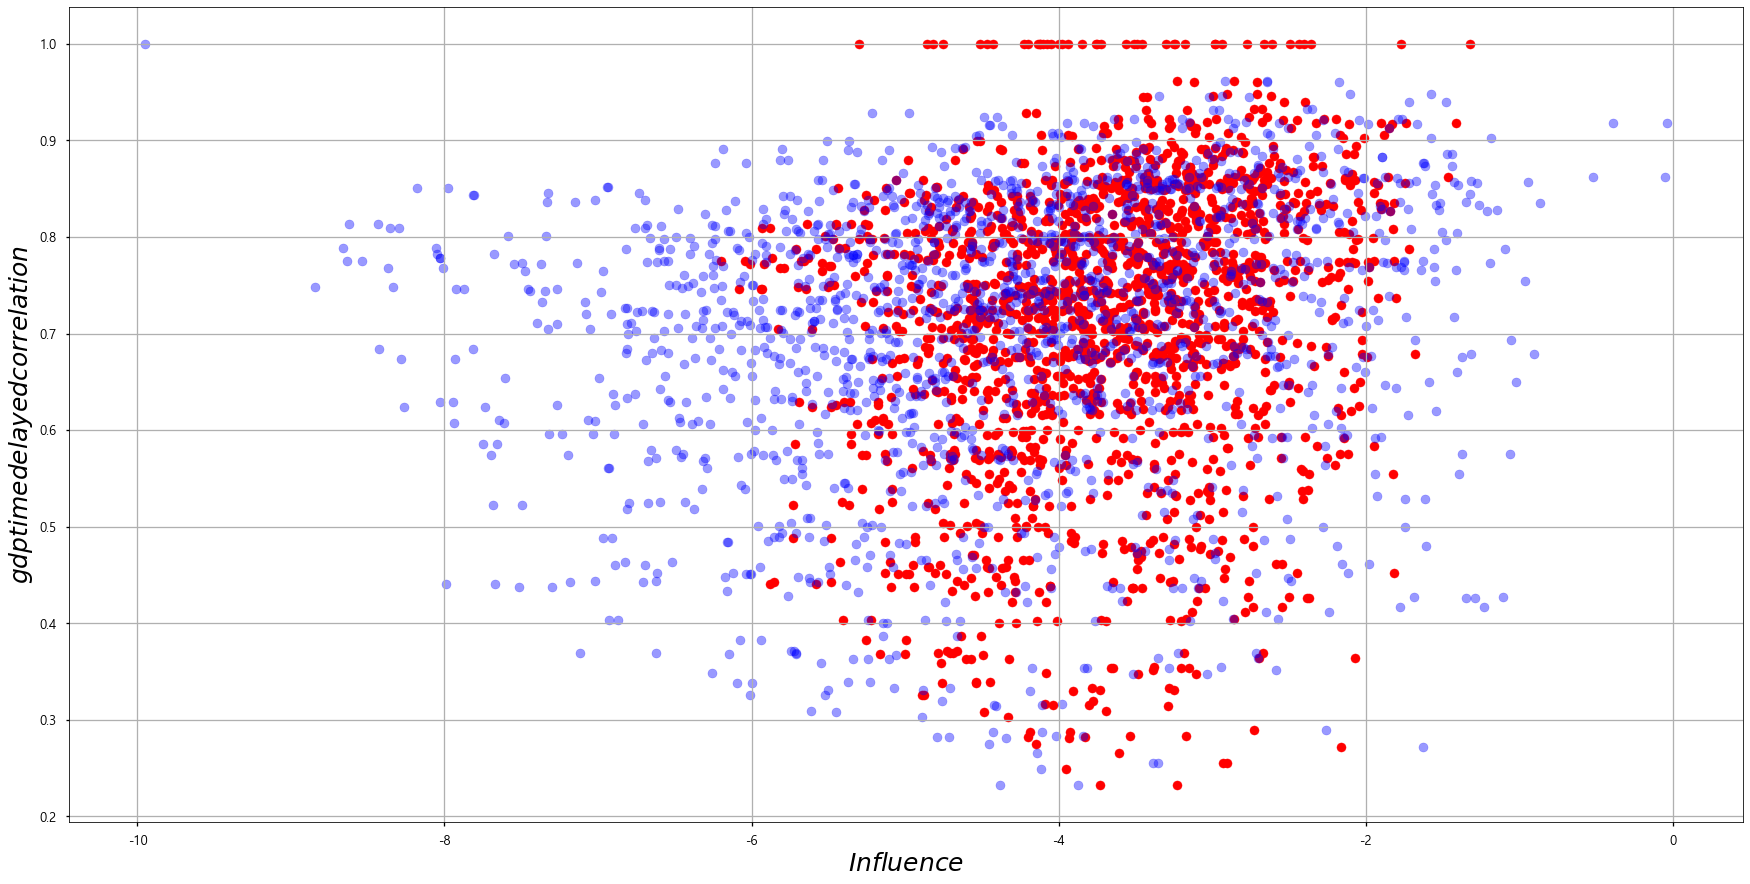

In [59]:
plt.rcParams["figure.figsize"] = (30,15)
plt.scatter(np.log(pageranked_Export_pivot+pageranked_Export_pivot.transpose()/2),time_delay_corr,color='red')
plt.scatter(np.log(Export_pivot+Export_pivot.transpose()/2),time_delay_corr,color='blue',alpha=0.4)
plt.ylabel('$gdp time delayed correlation$',fontsize=25)
plt.xlabel('$Influence$',fontsize=25)
plt.grid(True)

In [99]:
time_delay_corr

Country2,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Czech Republic,...,Romania,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Country1,,,,,,,,,,,,,,,,,,,,,
Argentina,1.000000,0.465510,0.443355,0.483416,0.575225,0.628807,0.471766,0.593324,0.446340,0.560943,...,0.451079,0.573922,0.402815,0.521880,0.473087,0.500316,0.528383,0.650157,0.456496,0.451715
Australia,0.465510,1.000000,0.756560,0.812066,0.656102,0.720003,0.827272,0.832358,0.947961,0.724773,...,0.750037,0.743235,0.668102,0.855082,0.659738,0.736354,0.775202,0.691198,0.764544,0.835467
Austria,0.443355,0.756560,1.000000,0.918236,0.622503,0.704672,0.888100,0.773880,0.730847,0.866470,...,0.783834,0.783195,0.907669,0.842620,0.820242,0.908096,0.871998,0.690020,0.861915,0.865009
Belgium,0.483416,0.812066,0.918236,1.000000,0.684057,0.755553,0.892657,0.827069,0.794927,0.879694,...,0.741692,0.790764,0.838232,0.873584,0.821099,0.913358,0.886403,0.710351,0.867714,0.917576
Brazil,0.575225,0.656102,0.622503,0.684057,1.000000,0.578345,0.662785,0.766528,0.712858,0.571672,...,0.575031,0.679918,0.573872,0.796403,0.621201,0.591182,0.703072,0.652707,0.623441,0.554924
Bulgaria,0.628807,0.720003,0.704672,0.755553,0.578345,1.000000,0.676787,0.781690,0.731478,0.836358,...,0.807996,0.822533,0.717100,0.782215,0.738683,0.716471,0.732302,0.665605,0.757577,0.746120
Canada,0.471766,0.827272,0.888100,0.892657,0.662785,0.676787,1.000000,0.784528,0.779684,0.788496,...,0.682571,0.679541,0.782227,0.859177,0.745061,0.865805,0.810700,0.694081,0.871713,0.917702
Chile,0.593324,0.832358,0.773880,0.827069,0.766528,0.781690,0.784528,1.000000,0.862203,0.782358,...,0.732238,0.788154,0.624327,0.899757,0.565305,0.795188,0.835954,0.808699,0.757757,0.807909
China,0.446340,0.947961,0.730847,0.794927,0.712858,0.731478,0.779684,0.862203,1.000000,0.765526,...,0.740294,0.803817,0.648485,0.881163,0.636778,0.734184,0.811628,0.695807,0.728045,0.787724


c:\users\ksy\anaconda3\envs\py368\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


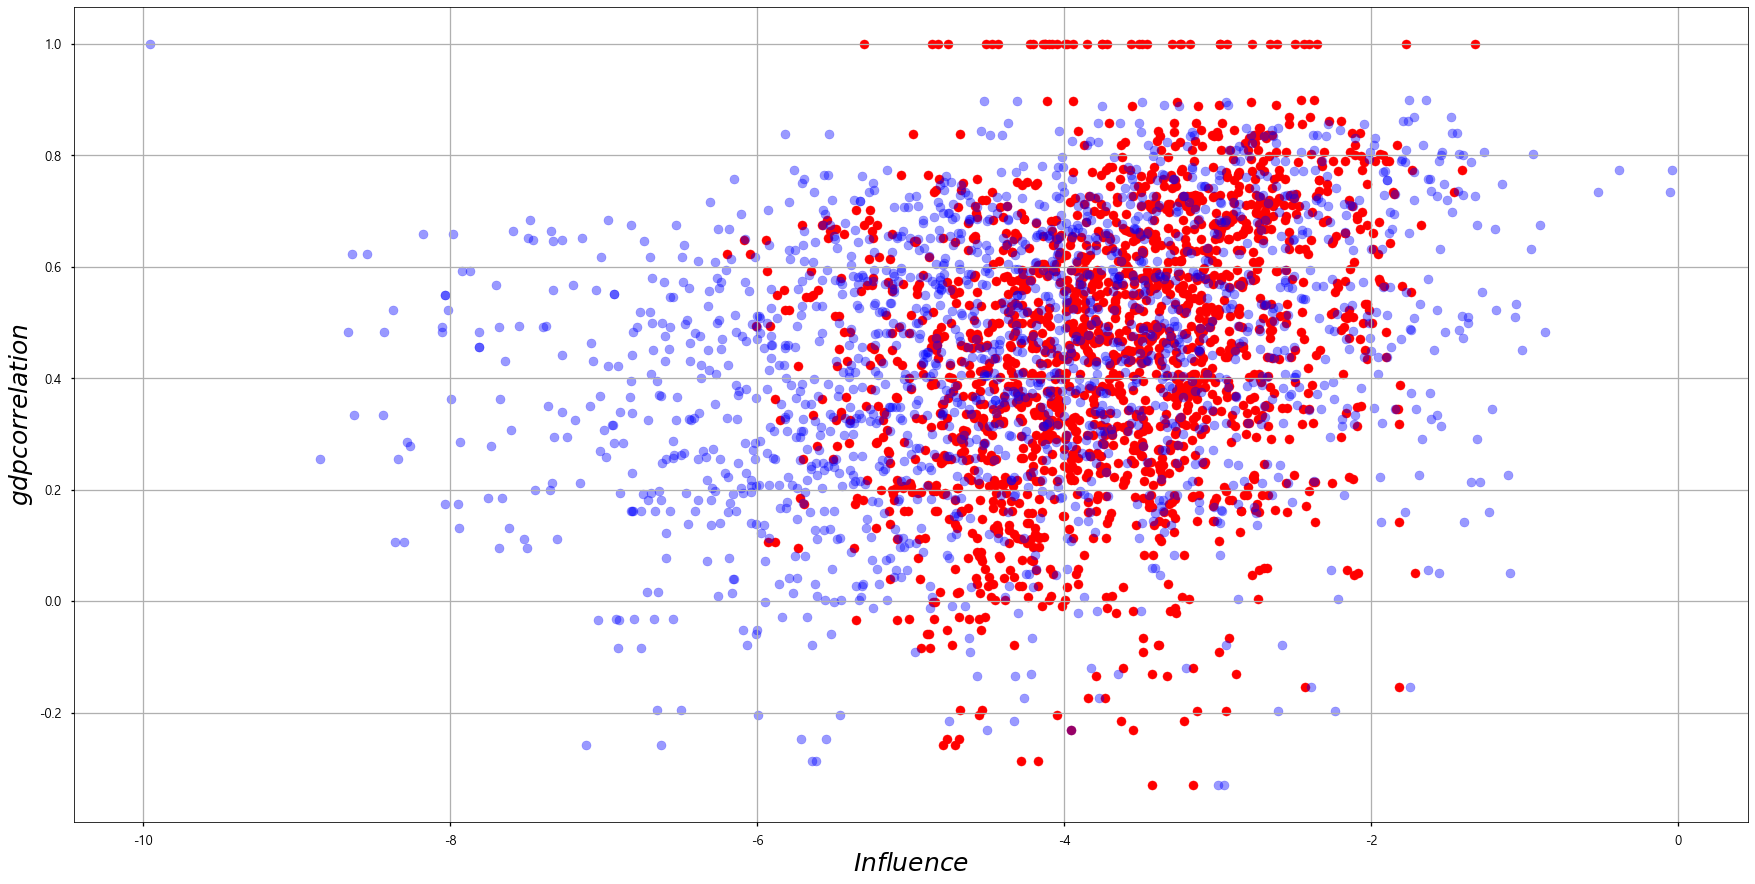

In [60]:
plt.rcParams["figure.figsize"] = (30,15)
plt.scatter(np.log(pageranked_Export_pivot+pageranked_Export_pivot.transpose()/2),corr,color='red')
plt.scatter(np.log(Export_pivot+Export_pivot.transpose()/2),corr,color='blue',alpha=0.4)
plt.ylabel('$gdp correlation$',fontsize=25)
plt.xlabel('$Influence$',fontsize=25)
plt.grid(True)

In [61]:
time_delay_corr

Country2,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Czech Republic,...,Romania,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Country1,,,,,,,,,,,,,,,,,,,,,
Argentina,1.000000,0.465510,0.443355,0.483416,0.575225,0.628807,0.471766,0.593324,0.446340,0.560943,...,0.451079,0.573922,0.402815,0.521880,0.473087,0.500316,0.528383,0.650157,0.456496,0.451715
Australia,0.465510,1.000000,0.756560,0.812066,0.656102,0.720003,0.827272,0.832358,0.947961,0.724773,...,0.750037,0.743235,0.668102,0.855082,0.659738,0.736354,0.775202,0.691198,0.764544,0.835467
Austria,0.443355,0.756560,1.000000,0.918236,0.622503,0.704672,0.888100,0.773880,0.730847,0.866470,...,0.783834,0.783195,0.907669,0.842620,0.820242,0.908096,0.871998,0.690020,0.861915,0.865009
Belgium,0.483416,0.812066,0.918236,1.000000,0.684057,0.755553,0.892657,0.827069,0.794927,0.879694,...,0.741692,0.790764,0.838232,0.873584,0.821099,0.913358,0.886403,0.710351,0.867714,0.917576
Brazil,0.575225,0.656102,0.622503,0.684057,1.000000,0.578345,0.662785,0.766528,0.712858,0.571672,...,0.575031,0.679918,0.573872,0.796403,0.621201,0.591182,0.703072,0.652707,0.623441,0.554924
Bulgaria,0.628807,0.720003,0.704672,0.755553,0.578345,1.000000,0.676787,0.781690,0.731478,0.836358,...,0.807996,0.822533,0.717100,0.782215,0.738683,0.716471,0.732302,0.665605,0.757577,0.746120
Canada,0.471766,0.827272,0.888100,0.892657,0.662785,0.676787,1.000000,0.784528,0.779684,0.788496,...,0.682571,0.679541,0.782227,0.859177,0.745061,0.865805,0.810700,0.694081,0.871713,0.917702
Chile,0.593324,0.832358,0.773880,0.827069,0.766528,0.781690,0.784528,1.000000,0.862203,0.782358,...,0.732238,0.788154,0.624327,0.899757,0.565305,0.795188,0.835954,0.808699,0.757757,0.807909
China,0.446340,0.947961,0.730847,0.794927,0.712858,0.731478,0.779684,0.862203,1.000000,0.765526,...,0.740294,0.803817,0.648485,0.881163,0.636778,0.734184,0.811628,0.695807,0.728045,0.787724


In [62]:
time_delayed_corr_list=[]
corr_list=[]
Export_pivot_list=[]
pageranked_Export_pivot_list=[]
for i in c_list:
    for j in c_list:
        if(i != j):
            time_delayed_corr_list.append(time_delay_corr.loc[i][j])
            corr_list.append(corr.loc[i][j])
            Export_pivot_list.append(np.log(Export_pivot.loc[i][j]+Export_pivot.loc[j][i]/2))
            pageranked_Export_pivot_list.append(np.log(pageranked_Export_pivot.loc[i][j]+pageranked_Export_pivot.loc[j][i]/2))

In [63]:
from scipy import stats

print('not Delayed')
print('무역영향력 & GDP 유사도')
print('spearman : ',stats.spearmanr(Export_pivot_list,(corr_list)))
print('pearson : ',stats.pearsonr(Export_pivot_list,corr_list))

print('PPR 영향력 & GDP 유사도')
print('spearman : ',stats.spearmanr(pageranked_Export_pivot_list,corr_list))
print('pearson : ',stats.pearsonr(pageranked_Export_pivot_list,corr_list))


print('Time Delayed')
print('무역영향력 & GDP 유사도')
print('spearman : ',stats.spearmanr(Export_pivot_list,(time_delayed_corr_list)))
print('pearson : ',stats.pearsonr(Export_pivot_list,time_delayed_corr_list))

print('PPR 영향력 & GDP 유사도')
print('spearman : ',stats.spearmanr(pageranked_Export_pivot_list,time_delayed_corr_list))
print('pearson : ',stats.pearsonr(pageranked_Export_pivot_list,time_delayed_corr_list))


not Delayed
무역영향력 & GDP 유사도
spearman :  SpearmanrResult(correlation=0.3092316228265273, pvalue=1.7846740779872698e-39)
pearson :  (0.292606430910166, 2.425251185036166e-35)
PPR 영향력 & GDP 유사도
spearman :  SpearmanrResult(correlation=0.31439428536039304, pvalue=8.174227026307256e-41)
pearson :  (0.2844979743881876, 2.0105089113295442e-33)
Time Delayed
무역영향력 & GDP 유사도
spearman :  SpearmanrResult(correlation=0.22365327953416703, pvalue=5.8076438936539545e-21)
pearson :  (0.1778127568623809, 1.0645134377453298e-13)
PPR 영향력 & GDP 유사도
spearman :  SpearmanrResult(correlation=0.23688052101999302, pvalue=2.1721439979029614e-23)
pearson :  (0.20376119090516992, 1.3530571253529485e-17)


In [64]:
time_delay_arr=[]
Export_pivot_arr=[]
for i in time_delay:
    for j in time_delay[i]:
        time_delay_arr.append(j)
for i in Export_pivot:
    for j in Export_pivot[i]:
        Export_pivot_arr.append(j)

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


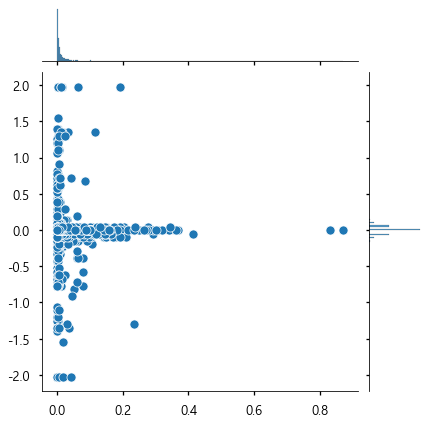

In [65]:
sns.jointplot(Export_pivot_arr,time_delay_arr)
sns.set_style()
sns.set_style('ticks')

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


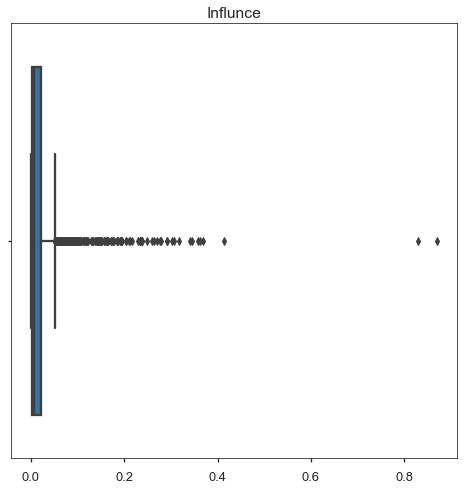

In [66]:
plt.rcParams["figure.figsize"] = (8,8)
p=sns.boxplot(Export_pivot_arr)
p.set_title('Influnce')
p=sns.set_style('ticks')

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'time delay')

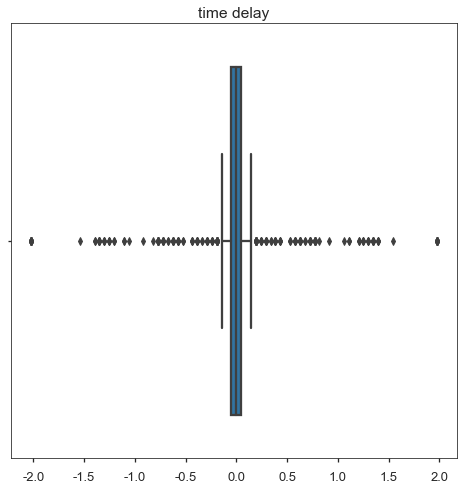

In [67]:
p=sns.boxplot(time_delay_arr)
p.set_title('time delay')

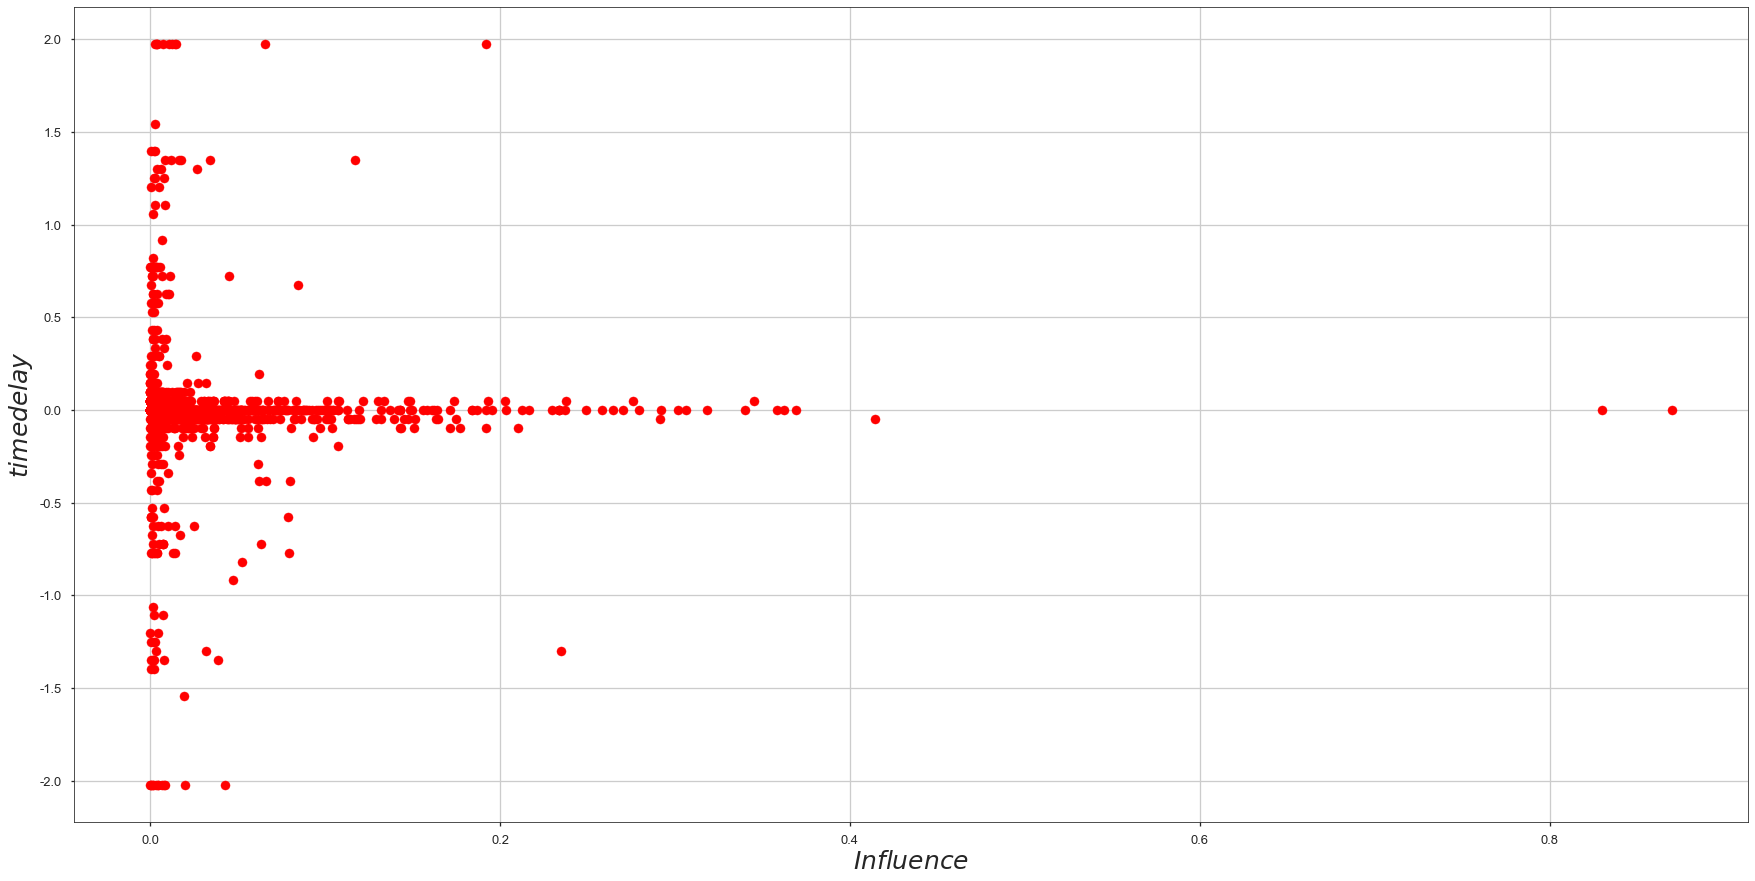

In [68]:
plt.rcParams["figure.figsize"] = (30,15)
plt.scatter((Export_pivot),(time_delay),color='red')
plt.xlabel('$Influence$',fontsize=25)
plt.ylabel('$time delay$',fontsize=25)
plt.grid(True)

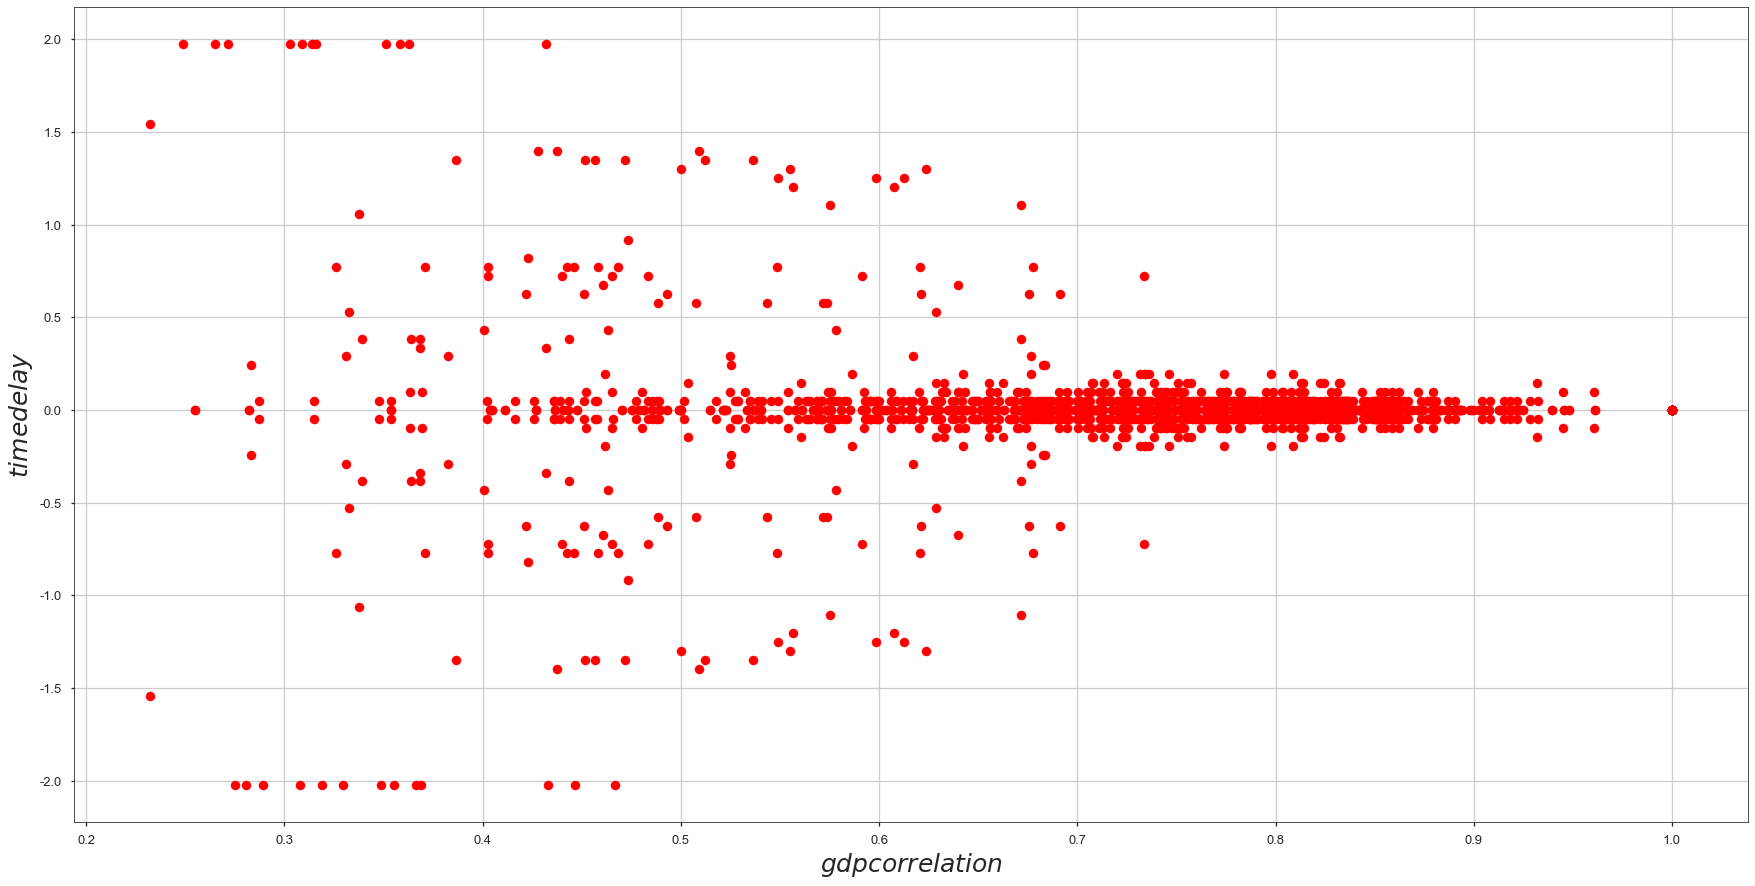

In [69]:
plt.rcParams["figure.figsize"] = (30,15)
plt.scatter(time_delay_corr,time_delay,color='red')
plt.ylabel('$time delay$',fontsize=25)
plt.xlabel('$gdp correlation$',fontsize=25)
plt.grid(True)

In [70]:
pageranked_Export_pivot

Reporter Name,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Czech Republic,...,Romania,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Partner Name,,,,,,,,,,,,,,,,,,,,,
Argentina,0.011046,0.005519,0.003416,0.004847,0.072153,0.004487,0.007989,0.077217,0.011349,0.003401,...,0.004070,0.003291,0.004188,0.016211,0.008777,0.003553,0.005909,0.005374,0.004478,0.007055
Australia,0.011721,0.025919,0.009289,0.011199,0.012282,0.009611,0.014624,0.012465,0.028606,0.009125,...,0.009592,0.008939,0.009541,0.018632,0.010560,0.009859,0.011293,0.010705,0.012862,0.013753
Austria,0.012104,0.012650,0.019896,0.016024,0.012595,0.021137,0.013285,0.011490,0.013030,0.030071,...,0.024995,0.030178,0.043907,0.016681,0.017404,0.015970,0.028649,0.017752,0.016082,0.012566
Belgium,0.030879,0.030170,0.034981,0.035344,0.030879,0.032725,0.031228,0.029505,0.030453,0.034288,...,0.034558,0.033394,0.034052,0.035032,0.037761,0.034740,0.036983,0.036210,0.038684,0.030955
Brazil,0.084573,0.012022,0.009391,0.012840,0.027770,0.010527,0.015711,0.049941,0.021994,0.008938,...,0.010217,0.009038,0.011157,0.020104,0.013749,0.009705,0.012024,0.011469,0.011415,0.016841
Bulgaria,0.002288,0.001848,0.007118,0.008439,0.002296,0.005381,0.002714,0.001910,0.002945,0.005370,...,0.034593,0.005655,0.011667,0.003528,0.005978,0.002880,0.004116,0.031101,0.003590,0.002359
Canada,0.045132,0.045527,0.034075,0.038889,0.044757,0.034679,0.054947,0.045564,0.046479,0.033129,...,0.034147,0.032755,0.034785,0.042236,0.037371,0.035351,0.038652,0.036720,0.039554,0.072028
Chile,0.028282,0.005384,0.003047,0.005159,0.025908,0.007125,0.008279,0.010680,0.018017,0.002843,...,0.003094,0.002804,0.003104,0.007496,0.006856,0.003853,0.004840,0.004405,0.005442,0.008441
China,0.048134,0.052367,0.031779,0.035792,0.046826,0.032688,0.044288,0.048276,0.048913,0.031648,...,0.032380,0.031249,0.033168,0.045222,0.035610,0.032655,0.035292,0.035447,0.036445,0.045883


In [71]:
ppr=[]
for i in c_list:
    ppr.append(pageranked_Export_pivot.loc[i].mean())
ppr=pd.DataFrame([ppr])
ppr.columns=[c_list]
ppr=ppr.transpose()
ppr.columns=['value']
kr_ppr=Export_pivot['Korea, Rep.']
kr_ppr=pd.DataFrame([kr_ppr])
kr_ppr=kr_ppr.transpose()
kr_ppr.columns=['value']
ppr=ppr.drop(['Romania'])
kr_ppr=kr_ppr.drop(['Romania'])

In [72]:
risk_influ = pd.read_csv('./data/risk_influ.csv',encoding='CP949')
kr_risk_influ = pd.read_csv('./data/kr_risk_influ.csv',encoding='CP949')
kr_risk_influ=kr_risk_influ.set_index('country')
risk_influ=risk_influ.set_index('country')

In [73]:
ppr.sort_index()

,value
Argentina,0.009482
Australia,0.015786
Austria,0.018038
Belgium,0.034382
Brazil,0.015692
Bulgaria,0.006657
Canada,0.040293
Chile,0.007266
China,0.039471
Czech Republic,0.013490


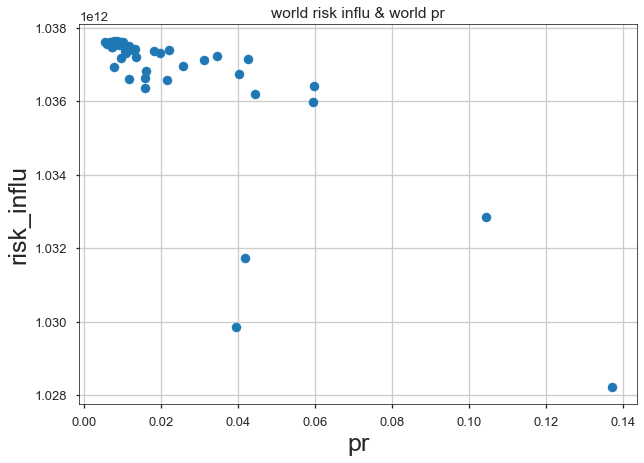

In [74]:
plt.rcParams["figure.figsize"] = (10,7)
plt.title('world risk influ & world pr')
plt.xlabel('pr',fontsize=25)
plt.ylabel('risk_influ',fontsize=25)
plt.scatter(ppr.sort_index(),risk_influ.sort_index())
plt.grid(True)

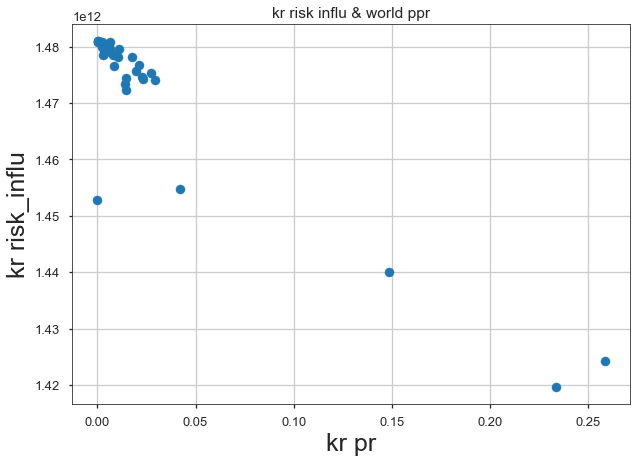

In [75]:
plt.scatter(kr_ppr.sort_index(),kr_risk_influ.sort_index())

plt.title('kr risk influ & world ppr')
plt.xlabel('kr pr',fontsize=25)
plt.ylabel('kr risk_influ',fontsize=25)
plt.grid(True)

In [76]:
influ1=dict()
for i in Export_pivot.columns:
    influ1[i]=Export_pivot[i].std()
influ1=pd.DataFrame([influ1])
influ1=influ1.transpose()
influ1.columns=['value']
influ2=dict()
for i in Export_pivot.columns:
    influ2[i]=pageranked_Export_pivot[i].std()
influ2=pd.DataFrame([influ2])
influ2=influ2.transpose()
influ2.columns=['value']

In [77]:
influ1.sort_values(by='value')

,value
Germany,0.029688
Sweden,0.031868
Finland,0.033493
Lithuania,0.036142
United Kingdom,0.036279
Italy,0.036623
South Africa,0.036886
Bulgaria,0.038515
France,0.039195
Greece,0.040883


c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'GDP & STD')

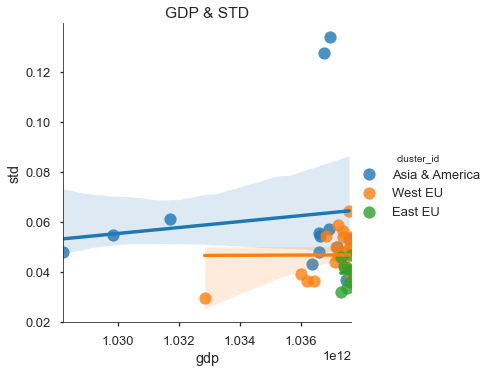

In [78]:
data = pd.concat([(virtual_data.from_influ),(influ1)],axis=1)
data.columns=['gdp','std']
data['cluster_id']=cluster
sns.lmplot('gdp','std',data=data,fit_reg=True,scatter_kws={"s":150},hue="cluster_id")
plt.title('GDP & STD')

In [79]:
Export_pivot_x=[]
Export_pivot_y=[]
for i in c_list:
    for j in c_list:
        Export_pivot_x.append(pageranked_Export_pivot.loc[i][j])
        Export_pivot_y.append(pageranked_Export_pivot.transpose().loc[i][j])

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


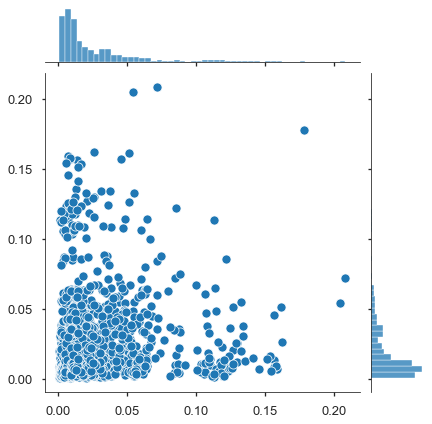

In [80]:
sns.jointplot(Export_pivot_x,Export_pivot_y)
sns.set_style()

spearman :  SpearmanrResult(correlation=0.20235166141322475, pvalue=9.350630925777478e-18)


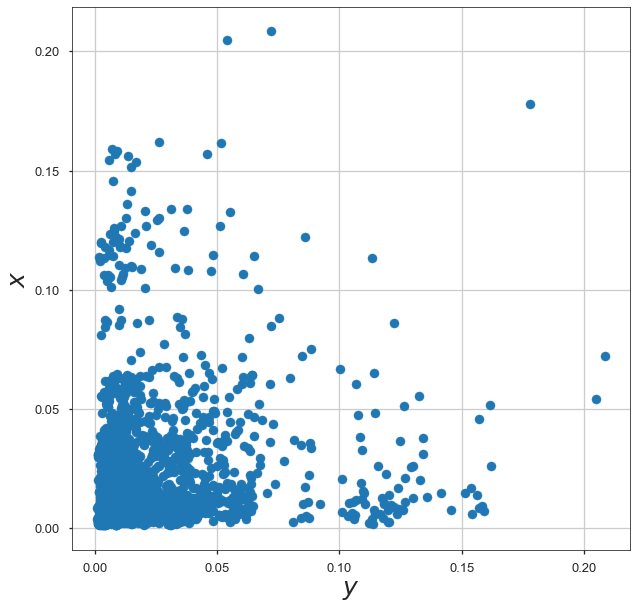

In [81]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.ylabel('$x$',fontsize=25)
plt.xlabel('$y$',fontsize=25)
plt.scatter((Export_pivot_x),(Export_pivot_y))

print('spearman : ',stats.spearmanr((np.array(Export_pivot_x).reshape(-1,1)),(np.array(Export_pivot_y).reshape(-1,1))))

In [82]:
print(time_delay.mean().mean())
print(time_delay.loc[w_eu][w_eu].mean().mean())
print(time_delay.loc[aa][aa].mean().mean())
print(time_delay.loc[e_eu][e_eu].mean().mean())

-0.001830183673469395
-0.0052452358276643945
2.9591836734792505e-07
2.244897959191583e-07


In [83]:

trans=[]
ppr=[]
trans2=[]
ppr2=[]
country1=[]#영향 받는애->수출하는애
country2=[]#주는애->수입하는애
for i in c_list:
    for j in c_list:
        if(i!=j):
            trans.append(Export_pivot[i][j])
            ppr.append(pageranked_Export_pivot[i][j])
            country1.append(i)
            country2.append(j)
        else:
            trans2.append(Export_pivot[i][j])
            ppr2.append(pageranked_Export_pivot[i][j])
df = pd.DataFrame([ x for x in zip(country1,country2,trans,ppr)])
df.columns=['transporter','importer','trans','ppr']
df2 = pd.DataFrame([ x for x in zip(trans2,ppr2)])
df2.columns=['trans','ppr']

Text(0.5, 0, 'trans')

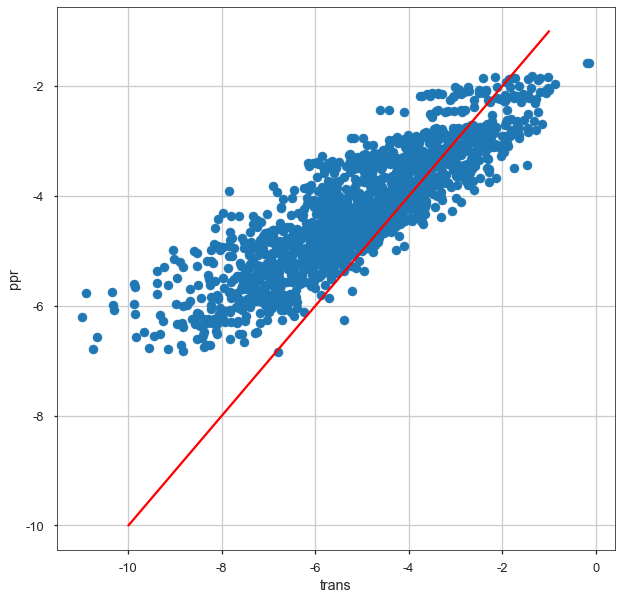

In [84]:
plt.figure(figsize=(10,10))
plt.scatter(np.log(df.trans),np.log(df.ppr))

plt.grid(True)
x=range(-10,0)
plt.plot(x,x,color='red')
plt.ylabel('ppr')
plt.xlabel('trans')

In [85]:
import statsmodels.api as sm
model = sm.OLS(df['trans'],df['ppr'])
results = model.fit() 
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  trans   R-squared (uncentered):                   0.617
Model:                            OLS   Adj. R-squared (uncentered):              0.617
Method:                 Least Squares   F-statistic:                              2777.
Date:                Wed, 12 Jan 2022   Prob (F-statistic):                        0.00
Time:                        14:40:26   Log-Likelihood:                          3246.7
No. Observations:                1722   AIC:                                     -6491.
Df Residuals:                    1721   BIC:                                     -6486.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

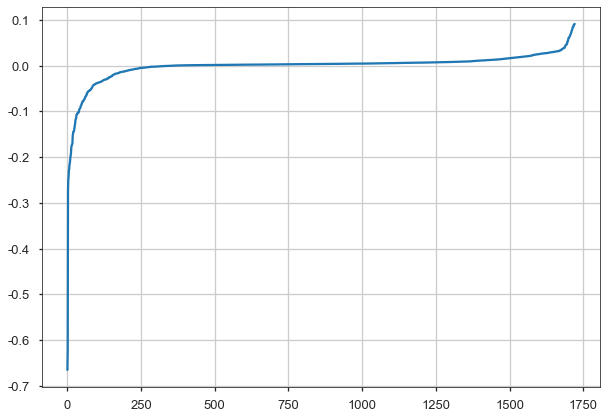

In [86]:
plt.plot(np.array((df.ppr-df.trans).sort_values()))
plt.grid(True)
plt.plot(0,color='red')

In [87]:
(df.trans).mean()

0.024390225434832612

In [88]:
df.loc[df.trans>df.ppr]

,transporter,importer,trans,ppr
3,Argentina,Brazil,0.291711,0.084573
6,Argentina,Chile,0.101972,0.028282
7,Argentina,China,0.079606,0.048134
9,Argentina,Denmark,0.008685,0.008283
16,Argentina,India,0.023733,0.011542
...,...,...,...,...
1689,United States,China,0.057865,0.045883
1703,United States,Japan,0.087924,0.051442
1704,United States,"Korea, Rep.",0.040159,0.026193
1707,United States,Mexico,0.158357,0.054176


In [89]:
df.loc[df.trans<df.ppr]

,transporter,importer,trans,ppr
0,Argentina,Australia,0.007074,0.011721
1,Argentina,Austria,0.000308,0.012104
2,Argentina,Belgium,0.010223,0.030879
4,Argentina,Bulgaria,0.001179,0.002288
5,Argentina,Canada,0.017517,0.045132
...,...,...,...,...
1716,United States,South Africa,0.005506,0.007498
1717,United States,Spain,0.010413,0.025464
1718,United States,Sweden,0.005491,0.013932
1719,United States,Switzerland,0.017161,0.020325


In [90]:
df2

,trans,ppr
0,0.000000,0.011046
1,0.000000,0.025919
2,0.000000,0.019896
3,0.000000,0.035344
4,0.000000,0.027770
5,0.000000,0.005381
6,0.000000,0.054947
7,0.000000,0.010680
8,0.000000,0.048913
9,0.000000,0.018916


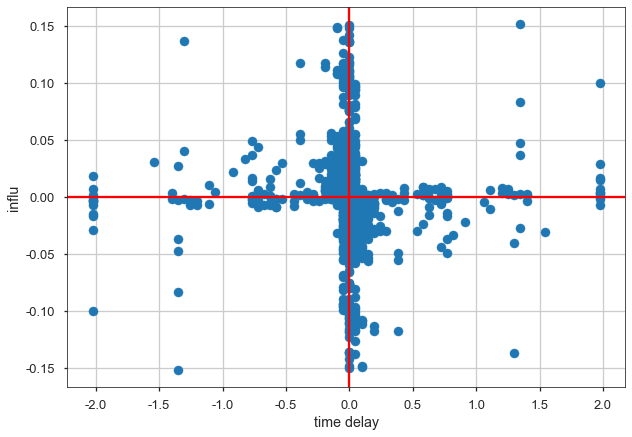

In [173]:
plt.scatter((time_delay),(pageranked_Export_pivot-pageranked_Export_pivot.transpose()))
plt.xlabel('time delay')
plt.ylabel('influ')
plt.axhline(y=0,c='r')
plt.axvline(x=0, c='r')
plt.grid(True)

In [178]:
time_delay_df=time_delay.copy()
time_delay_df2=time_delay.copy()
time_delay_df3=time_delay.copy()
time_delay_df4=time_delay.copy()
for i in c_list:
    for j in c_list:
        time_delay_df[i][j]=1 if time_delay[i][j]>0 and(pageranked_Export_pivot-pageranked_Export_pivot.transpose())[i][j]>0 else 0
        time_delay_df2[i][j]=1 if time_delay[i][j]>0 and(pageranked_Export_pivot-pageranked_Export_pivot.transpose())[i][j]<0 else 0
        time_delay_df3[i][j]=1 if time_delay[i][j]<0 and(pageranked_Export_pivot-pageranked_Export_pivot.transpose())[i][j]<0 else 0
        time_delay_df4[i][j]=1 if time_delay[i][j]<0 and(pageranked_Export_pivot-pageranked_Export_pivot.transpose())[i][j]>0 else 0
        

In [179]:
print('1사분면',time_delay_df.sum().sum())
print('2사분면',time_delay_df2.sum().sum())
print('3사분면',time_delay_df3.sum().sum())
print('4사분면',time_delay_df4.sum().sum())

1사분면 157.0
2사분면 343.0
3사분면 158.0
4사분면 344.0
